In [1]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

import tensorflow as tf
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN, AgglomerativeClustering, SpectralClustering, KMeans

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input
from keras.optimizers import Adam
from keras.utils import to_categorical

In [2]:
cenario1 = 'C:/Users/david/OneDrive/Desktop/FERV codigo/Analise_Estatica/V1A1F2_REV2_091123/'
cenario2 = 'C:/Users/david/OneDrive/Desktop/FERV codigo/Analise_Estatica/V2A2F2_REV4_081123/'
cenario3 = 'C:/Users/david/OneDrive/Desktop/FERV codigo/Analise_Estatica/V3A3F2_REV2_091123/'
cenarioMPV = 'C:/Users/david/OneDrive/Desktop/FERV codigo/Analise_Estatica/MPV_(FNS Lim)_RC/'

cenario5 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V2A2F2_RESP_FNS_lim_rev2_2026/'
cenario6 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V2A2F3_RESP_FNS_lim_rev1_2026/'
cenario7 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V2A2F4_RESP_FNS_lim_rev1_2026/'
cenario8 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V2A2F5_RESP_FNS_lim_rev1_2026/'

cenario9 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V1A1F2_RESP_FNS_lim_rev1_2026/'
cenario10 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V1A1F3_RESP_FNS_lim_rev1_2026/'
cenario11 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V1A1F4_RESP_FNS_lim_rev1_2026/'
cenario12 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V1A1F5_RESP_FNS_lim_rev1_2026/'

folderimg = 'ImagesCenarios/'
RegressorML = False
shapValues = False
#pathscenarios = [cenario5, cenario6, cenario7, cenario8, cenario9, cenario10, cenario11, cenario12]
pathscenarios = [cenario9, cenario10, cenario11, cenario12]

# Functions for PLOT

In [3]:
def plot_indice_reg(df_data, eje_y, name, title, INDICE, xlimites=None, ylimites=None, order=False, ax=None):

    if ax is None:
        fig, axs = plt.subplots(nrows=1, figsize=(8, 6), sharex=False)
    else:
        axs = ax

    colores = [sns.color_palette("Paired")[1], sns.color_palette("Paired")[3], sns.color_palette("Paired")[5],sns.color_palette("Paired")[7],sns.color_palette("Paired")[9]]
    for idx, regiao in enumerate(['Northeast','North','SE-CW', 'South', 'AC-RO']):
        if order:
            data = df_data.loc[:, :, regiao].sort_values(INDICE, ascending=False)[INDICE]
            data_points_per_day = 10
            num_days = (len(df_data)/5)*data_points_per_day / 100
            axs.set_xticks([round(i * num_days) for i in range(data_points_per_day+1)])
            axs.set_xticklabels([f'{i*10}' for i in range(data_points_per_day+1)], fontsize=12, rotation=0, ha='center')
            axs.set_xlabel('Percentage of half hours in a month (%)', fontsize=23)
        else:
            data = df_data.loc[:, :, regiao][INDICE]
            axs.set_xlabel('Operating Points', fontsize=23)
        
        axs.plot(data.values, color=colores[idx], label=regiao, lw=2, linestyle='-')
        
    axs.legend(loc='upper right', fontsize=18)
    axs.tick_params(axis='y', labelsize=24)
    axs.tick_params(axis='x', labelsize=24)
    axs.set_ylabel(eje_y, fontsize=22)
    axs.set_title(title, fontsize=22)
    if xlimites is not None:
        axs.set_xlim(xlimites)
    if ylimites is not None:
        axs.set_ylim(ylimites)
    axs.grid(True, linestyle='-', linewidth=1.2, alpha=0.4)
    plt.tight_layout()
    if ax is None:
        plt.show()

def plot_indice_dec(df_data, eje_y, title, xlimites=None, ylimites=None, order=False, ax=None):

    if ax is None:
        fig, axs = plt.subplots(nrows=1, figsize=(8, 6), sharex=False)
    else:
        axs = ax

    colores = [sns.color_palette("Paired")[1], sns.color_palette("Paired")[3], sns.color_palette("Paired")[5],sns.color_palette("Paired")[7],sns.color_palette("Paired")[9]]
    indicedic = {'DPI_(u)_PQ':['OV DPI_PQ',r'$\mathrm{DPI}_\mathrm{PQ}^\mathrm{u}$'],
             'DPI_(l)_PQ': ['UV DPI_PQ',r'$\mathrm{DPI}_\mathrm{PQ}^\mathrm{l}$'],
             'DPI_(u)_PV':['OV DPI_PV',r'$\mathrm{DPI}_\mathrm{PV}^\mathrm{u}$'],
            'DPI_(l)_PV': ['UV DPI_PV', r'$\mathrm{DPI}_\mathrm{PV}^\mathrm{l}$']}

    for idx, indices in enumerate(indicedic.keys()):
        if order:
            data = df_data.sort_values([indicedic[indices][0]], ascending=False)[indicedic[indices][0]]
            data_points_per_day = 10
            num_days = (len(df_data)/5)*data_points_per_day / 100
            axs.set_xticks([round(i * num_days) for i in range(data_points_per_day+1)])
            axs.set_xticklabels([f'{i*10}' for i in range(data_points_per_day+1)], fontsize=12, rotation=0, ha='center')
            axs.set_xlabel('Percentage of half hours in a month (%)', fontsize=23)
        else:
            data = df_data[indicedic[indices][0]]
            axs.set_xlabel('Operating Points', fontsize=23)
        
        axs.plot(data.values, color=colores[idx], label=indices, lw=2, linestyle='-')
        
    axs.legend(loc='upper right', fontsize=18)
    axs.tick_params(axis='y', labelsize=24)
    axs.tick_params(axis='x', labelsize=24)
    axs.set_ylabel(eje_y, fontsize=22)
    axs.set_title(title, fontsize=22)
    if xlimites is not None:
        axs.set_xlim(xlimites)
    if ylimites is not None:
        axs.set_ylim(ylimites)
    axs.grid(True, linestyle='-', linewidth=1.2, alpha=0.4)

    if ax is None:
        plt.show()
        
def plot_indice (df_data, eje_y, name, title, INDICE, xlimites=None,ylimites=None, order = False, ax=None):
    
    if ax is None:
        fig, axs = plt.subplots(nrows=1, figsize=(10, 6), sharex=False)
    else:
        axs = ax

    colores = [sns.color_palette("Paired")[5], sns.color_palette("Paired")[1], sns.color_palette("Paired")[3]]
    # for idx, cenario in enumerate(['Cenario Baixa','Cenario Média','Cenario Alta']):      
    #     if order:
    #         data = df_data.loc[:, :, cenario].sort_values(INDICE, ascending=False)[INDICE]
    #         data_points_per_day = 10
    #         num_days = (len(df_data))*data_points_per_day / 100
    #         axs.set_xticks([round(i * num_days) for i in range(data_points_per_day+1)])
    #         axs.set_xticklabels([f'{i*10}' for i in range(data_points_per_day+1)], fontsize=12, rotation=0, ha='center')
    #         axs.set_xlabel('Percentage of half hours in a month (%)', fontsize=23)
    #     else:
    #         data = df_data.loc[:, :, cenario][INDICE]
    #         axs.set_xlabel('Operating Points', fontsize=23)
        
    #     axs.plot(data.values, color=colores[idx], label=cenario, lw=2, linestyle='-')

     
    if order:
        data = df_data.sort_values(INDICE, ascending=False)[INDICE]
        data_points_per_day = 10
        num_days = (len(df_data))*data_points_per_day / 100
        axs.set_xticks([round(i * num_days) for i in range(data_points_per_day+1)])
        axs.set_xticklabels([f'{i*10}' for i in range(data_points_per_day+1)], fontsize=12, rotation=0, ha='center')
        axs.set_xlabel('Percentage of half hours in a month (%)', fontsize=23)
    else:
        data = df_data[INDICE]
        axs.set_xlabel('Operating Points', fontsize=23)
    

    
    area_trapezoidal = np.trapz(data.values)/len(data)
    media = np.mean(data.values)
    axs.plot(data.values, color=colores[1], label='Todos os Cenarios', lw=2, linestyle='-')
        
    axs.legend(loc='upper right', fontsize=18)
    axs.tick_params(axis='y', labelsize=24)
    axs.tick_params(axis='x', labelsize=24)
    axs.set_ylabel(eje_y, fontsize=22)
    axs.set_title(f'{title} normalized area/mean: {area_trapezoidal, media}', fontsize=15)
    if xlimites is not None:
        axs.set_xlim(xlimites)
    if ylimites is not None:
        axs.set_ylim(ylimites)
    axs.grid(True, linestyle='-', linewidth=1.2, alpha=0.4)
    plt.tight_layout()
    if ax is None:
        plt.show()
    return area_trapezoidal

def boxplot_linhas(df, clase, yvalue, titulo, xlbl, ylbl, hue_ , ylim = None, legendPos = False):
    df = df.reset_index()
    plt.figure(figsize=(12, 6))
    boxplot = sns.boxplot(data=df, x=clase, y=yvalue, hue = hue_, width=0.7, linewidth=1, gap=.05, palette = "rainbow")
    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel(ylbl, fontsize=15)
    plt.tick_params(axis='both', labelsize=12)
    if legendPos:
        plt.legend(title='Clase', bbox_to_anchor=(1.22, 1), loc='upper right')
    else:
        plt.legend(title='Clase',loc='best')
    if ylim !=  None:
        plt.ylim(ylim)
    plt.grid()
    plt.show()

# Data Processing

In [4]:
# Definir una función que recibe un nombre de archivo, un valor de cenario y una lista, y devuelve la lista con el dataframe leído y modificado
def read_and_append(filename, cenario, lst):
  # Leer el archivo CSV
  df = dd.read_csv(filename)
  # Agregar la columna 'Cenario' con el valor correspondiente
  df['Cenario'] = cenario
  # Agregar el dataframe a la lista
  lst.append(df.compute())
  # Devolver la lista
  return lst

def IndiceLinhas(df, n):
    
    # Filter the DataFrame once
    df_filtered = df.loc[~(df['L1(MVA)'] == 9999) & df['VBASEKV'].isin([230, 345, 440, 500, 525, 765])].copy()
    # Calculate MW_Flow
    df_filtered.loc[:, 'MW_Flow'] = np.where(df_filtered['MW:From-To'] >= 0, df_filtered['MW:From-To'], df_filtered['MW:To-From'])
    # Calculate PI_mva
    df_filtered.loc[:, 'PI_mva'] = (df_filtered['% L1'] / 100) ** (2 * n)

    # Group by multiple columns and aggregate
    df_r_nt = df_filtered.groupby(['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV']).agg({'MW_Flow': 'sum', 'MVA': 'sum', 'PI_mva': 'sum'})
    df_r = df_filtered.groupby(['Dia', 'Hora', 'Cenario', 'REG']).agg({'MW_Flow': 'sum', 'MVA': 'sum', 'PI_mva': 'sum'})
    df_po = df_filtered.groupby(['Dia', 'Hora', 'Cenario']).agg({'MW_Flow': 'sum', 'MVA': 'sum', 'PI_mva': 'sum'})

    # Calculate PFI
    df_r_nt['PFI'] = df_r_nt['MW_Flow'] / df_r_nt['MVA']
    df_r['PFI'] = df_r['MW_Flow'] / df_r['MVA']
    df_po['PFI'] = df_po['MW_Flow'] / df_po['MVA']

    # Apply PI_mva correction
    df_r_nt['PI_mva'] = df_r_nt['PI_mva'] ** (1 / (2 * n))
    df_r['PI_mva'] = df_r['PI_mva'] ** (1 / (2 * n))
    df_po['PI_mva'] = df_po['PI_mva'] ** (1 / (2 * n))

    return df_r_nt, df_r, df_po

def flatdf(df, BG):
    df_reordered = df.reorder_levels(['Dia','Hora','Cenario','REG',BG])
    regionmap = {'Nordeste':'Northeast', 'Norte':'North', 'Sudeste-Centro-Oeste':'SE-CW', 'Sul':'South','AC-RO':'AC-RO'}
    df_reordered = df_reordered.rename(index=regionmap, level='REG')

    df_reordered_sorted = df_reordered.sort_index(level=['Dia','Hora','Cenario','REG'])
    df_reordered_sorted.rename(columns={'CSI_INF':'DPI_inf', 'CSI_SUP':'DPI_sup'}, inplace=True)
    lista = [[index[0],index[1],index[2]] for index in df_reordered.index]

    conjunto_filtros = set(map(tuple, lista))
    conjunto_filtros = tuple(sorted(conjunto_filtros))
    data = [df_reordered_sorted.loc[i].values.flatten() for i in conjunto_filtros]
    datapd = pd.DataFrame(data, index=conjunto_filtros)
    datapd.index.names = ['Dia','Hora', 'Cenario']
    columns = []
    for reg in df_reordered_sorted.reset_index('REG')['REG'].unique():
        for bg in df_reordered_sorted.loc[:,:,:,reg,:].reset_index(BG)[BG].unique():
            for column in df_reordered_sorted.columns:
                if reg == 'Sudeste-Centro-Oeste':
                    reg = 'SE-CO'
                name = column + '_' + reg + '_' + str(bg)
                columns.append(str(name))
    datapd.columns = columns
    return datapd

def read_data():
  # Crear un diccionario vacío para guardar las listas de dataframes
  dfs = {}
  # Llenar el diccionario con las listas vacías para cada clave
  keys = ['pot_mw', 'pot_mvar', 'pot_mw_reserv', 'pot_mvar_reserv', 'Index', 'Index_PO', 'Index_Modif', 'linhas', 'Trafo', 'intercambios', 'HVDC', 'ger', 'nt', 'ger_reg','IndexDec_PQ','IndexDec_PV','OPF_NC','PWF_NC']
  for key in keys:
    dfs[key] = []

  # Crear una lista de tuplas con los nombres de los archivos y las claves del diccionario
  filenames = [('MW_PO.csv', 'pot_mw'), ('MVAR_PO.csv', 'pot_mvar'), ('Reserva_MW_PO.csv', 'pot_mw_reserv'), ('ReservaMVAR_PO.csv', 'pot_mvar_reserv'),
                ('Indice.csv', 'Index'), ('Indice_PO.csv', 'Index_PO'), ('Indice_Modif.csv', 'Index_Modif'), ('Linhas.csv', 'linhas'), ('Trafo.csv', 'Trafo'),
                ('DF_Intercambios.csv', 'intercambios'), ('DF_HVDC.csv', 'HVDC'),  ('DF_POT_Reg.csv','ger_reg'),('Indice_DecompPQ.csv', 'IndexDec_PQ'), ('Indice_DecompPV.csv', 'IndexDec_PV'),
                ('OPF_NC.csv', 'OPF_NC'), ('PWF_NC.csv', 'PWF_NC')
                ]


  dic_cenarios = {'V1A1F2_REV2_091123':'Cenario Baixa', 'V2A2F2_REV4_081123':'Cenario Média', 'V3A3F2_REV2_091123':'Cenario Alta', 
                'MPV_(FNS Lim)_RC': 'Cenario MPV', 'V2A2F2_RESP_FNS_lim_rev2_2026':'Cenario Media F2', 'V2A2F3_RESP_FNS_lim_rev1_2026':'Cenario Media F3',
                'V2A2F4_RESP_FNS_lim_rev1_2026':'Cenario Media F4', 'V2A2F5_RESP_FNS_lim_rev1_2026':'Cenario Media F5',
                'V1A1F2_RESP_FNS_lim_rev1_2026':'Cenario Baixa F2', 'V1A1F3_RESP_FNS_lim_rev1_2026':'Cenario Baixa F3',
                'V1A1F4_RESP_FNS_lim_rev1_2026':'Cenario Baixa F4', 'V1A1F5_RESP_FNS_lim_rev1_2026':'Cenario Baixa F5'}

  for path in pathscenarios:
    # Determinar el valor de la variable cenario según el nombre del directorio
    cenario = dic_cenarios[path.split('/')[-2]]
    # Iterar sobre los elementos de la lista filenames
    for filename, key in filenames:
      # Llamar a la función read_and_append con el nombre del archivo, el valor de cenario y la lista correspondiente del diccionario
      dfs[key] = read_and_append(path + filename, cenario, dfs[key])


  df_indice_grop = pd.concat(dfs['Index_PO'], axis=0)
  df_NC = df_indice_grop

  def filtarNC(df):
      df_fiiltrado = []
      for df_ in df:
          cenario = df_['Cenario'][0]
          bool_PWF_NConv = df_NC[df_NC['Cenario']==cenario][['Dia', 'Hora']].apply(tuple, axis=1)
          filtro = (df_[['Dia', 'Hora']].apply(tuple, axis=1).isin(bool_PWF_NConv))
          df_filt = df_[filtro]
          df_fiiltrado.append(df_filt)
      return df_fiiltrado
  
  print('====== Començo da concatenação ======')
  # Directly set index during concatenation
  ddff1 = pd.concat(dfs['IndexDec_PV'], axis=0).set_index(['Dia', 'Hora', 'Cenario', 'REG', 'Gen_Type'])
  ddff2 = pd.concat(dfs['IndexDec_PQ'], axis=0).set_index(['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV'])
  df_DPI = pd.concat([flatdf(ddff2, 'VBASEKV'), flatdf(ddff1, 'Gen_Type')], axis=1)
  df_ger_reg_concat = pd.concat(filtarNC(dfs['ger_reg']), axis=0)

  # Avoid unnecessary concatenation and renaming
  df_indice_group = pd.concat(dfs['Index_Modif'], axis=0).rename(columns={'Unnamed: 0': 'Indice'})
  df_linhas = pd.concat(dfs['linhas'], axis=0)
  df_intercambios_01 = pd.concat(dfs['intercambios'], axis=0).rename(columns={'Unnamed: 0': 'Intercambio'})
  df_hvdc_01 = pd.concat(dfs['HVDC'], axis=0).rename(columns={'Unnamed: 0': 'Intercambio', ' P(MW)': 'MW:From-To', ' Q(Mvar)': 'Mvar:From-To'})
  df_Indice_REG = pd.concat(dfs['Index'], axis=0).rename(columns={'Unnamed: 0': 'Indice'})
  df_Trafo = pd.concat(dfs['Trafo'], axis=0).rename(columns={'% L1': '% L1_Trafo', 'Mvar:Losses': 'Mvar:Losses_Trafo'})
  df_reserva = pd.concat(dfs['pot_mw_reserv'], axis=0).set_index(['Dia', 'Hora', 'Cenario'])

  # Directly set index during renaming
  df_hvdc_01 = df_hvdc_01.set_index(['Dia', 'Hora', 'Cenario', 'Intercambio'])
  df_intercambios_01 = df_intercambios_01.set_index(['Dia', 'Hora', 'Cenario', 'Intercambio'])
  df_indice_grop = df_indice_grop.set_index(['Dia', 'Hora', 'Cenario'])
  df_indice_group = df_indice_group.set_index(['Dia', 'Hora', 'Cenario'])
  df_Indice_REG = df_Indice_REG.set_index(['Indice', 'Dia', 'Hora', 'REG', 'Cenario'])

  
  concatenated_HVDC = pd.concat([df_hvdc_01.loc[:,:,:,'Elo_FOZ-IBIUNA']['MW:From-To'], df_hvdc_01.loc[:,:,:,'Elo_PVEL-ARARQ']['MW:From-To'], df_hvdc_01.loc[:,:,:,'Elo_XINGU-SE']['MW:From-To'], df_hvdc_01.loc[:,:,:,'Elo_CPVBTB-PVEL']['MW:From-To']], axis=1,keys=['Elo_FOZ-IBIUNA', 'Elo_PVEL-ARARQ', 'Elo_XINGU-SE', 'Elo_CPVBTB-PVEL'])
  concatenated_FluxoAC = pd.concat([df_intercambios_01.loc[:,:,:,'Fluxo_N-S']['MW:From-To'],df_intercambios_01.loc[:,:,:,'Fluxo_NE-N']['MW:From-To'], df_intercambios_01.loc[:,:,:,'Fluxo_NE-SE']['MW:From-To'], df_intercambios_01.loc[:,:,:,'Fluxo_SUL-SECO']['MW:From-To']], axis=1, keys=['Fluxo_N-S', 'Fluxo_NE-N', 'Fluxo_NE-SE', 'Fluxo_SUL-SECO'])
  
  df_Inter_AC_DC = concatenated_HVDC.merge(concatenated_FluxoAC, on =['Dia','Hora','Cenario'], how='left')
  
  # df_Inter_AC_DC = pd.concat([df_hvdc_01[['MW:From-To', 'Mvar:From-To']], df_intercambios_01], axis=0)

  print('====== Fim da concatenação ======')
  
  return df_ger_reg_concat, df_linhas, df_indice_group, df_Indice_REG, df_Trafo, df_indice_grop, df_Inter_AC_DC, df_reserva, df_DPI
  
def process_data(df_ger_reg_concat, df_linhas, df_indice_group, df_Indice_REG, df_Trafo, df_indice_grop, dfl_r):
    

    DFF_POT = df_ger_reg_concat.drop(columns=['REG','PG_FERV']).groupby(by=['Dia', 'Hora', 'Cenario']).sum()
    DFF_POT_REG = df_ger_reg_concat.set_index(['Dia','Hora','REG','Cenario']).drop(columns='PG_FERV')
    
    # =================================================== POR PONTO DE OPERAÇÃO ===================================================================================================
    # =============================================================================================================================================================================
    # Filter lines based on voltage level
    df_linhas_500up = df_linhas[df_linhas['VBASEKV'].isin([500, 525, 765])]
    df_linhas_500down = df_linhas[df_linhas['VBASEKV'].isin([230, 345, 440])]
    df_linhas_filtered = df_linhas[df_linhas['VBASEKV'].isin([230, 345, 440, 500, 525, 765])]
    df_linhas_grouped = df_linhas_filtered.groupby(['Dia', 'Hora', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'})
    df_linhas_grouped_500up = df_linhas_500up.groupby(['Dia', 'Hora', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'})
    df_linhas_grouped_500down = df_linhas_500down.groupby(['Dia', 'Hora', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'})
    df_linhas_grouped_500up = df_linhas_grouped_500up.rename(columns={'% L1': '% L1_500up', 'Mvar:Losses': 'Mvar:Losses_500up'})
    df_linhas_grouped_500down = df_linhas_grouped_500down.rename(columns={'% L1': '% L1_500down', 'Mvar:Losses': 'Mvar:Losses_500down'})
    DF_complete_PO = pd.concat([df_linhas_grouped_500up, df_linhas_grouped_500down, df_linhas_grouped], axis=1)
    DF_complete_PO = DF_complete_PO.merge(DFF_POT.groupby(['Dia', 'Hora', 'Cenario']).sum(), on=['Dia', 'Hora', 'Cenario'], how='left')
    DF_complete_PO = df_indice_group.merge(DF_complete_PO, on=['Dia', 'Hora', 'Cenario'], how='left')
    DF_complete_PO[['Mvar:Losses_500up', '% L1_500up']] = DF_complete_PO[['Mvar:Losses_500up', '% L1_500up']].fillna(0)
    DF_complete_PO['PG_FERV'] = (DF_complete_PO['PG_EOL'] + DF_complete_PO['PG_SOL']) / DF_complete_PO['PL_MW']  # Hasta esta linea son 6 segundos

    # =================================================== POR REGIÃO ==============================================================================================================
    # =============================================================================================================================================================================

    # Filter lines by voltage level and group by Dia, Hora, REG, and Cenario
    df_linhas_500up_grouped = df_linhas_500up.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'% L1': '% L1_500up', 'Mvar:Losses': 'Mvar:Losses_500up'})
    df_linhas_500down_grouped = df_linhas_500down.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'% L1': '% L1_500down', 'Mvar:Losses': 'Mvar:Losses_500down'})
    df_Trafo_grouped_REG = df_Trafo[df_Trafo['VBASEKV'].isin([230, 345, 440, 500, 525, 765])].groupby(by = ['Dia','Hora','REG','Cenario']).agg({'% L1_Trafo':'mean', 'Mvar:Losses_Trafo':'sum'})

    # Merge grouped line dataframes
    df_linhas_grouped_REG = pd.concat([df_linhas_500up_grouped, df_linhas_500down_grouped], axis=1)
    # Merge with DFF_POT_REG
    DF_complete_PO_REG = df_linhas_grouped_REG.merge(DFF_POT_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    # Merge df_hvdc_01 and df_intercambios_01
    
    df_Indice_REG_PV = df_Indice_REG.loc['DPI_PV']
    df_Indice_REG_PQ = df_Indice_REG.loc['DPI_PQ']
    # Merge df_Indice_REG_PV with DF_complete_PO_REG and df_Trafo_grouped_REG
    df_REG_Cenario_PV = df_Indice_REG_PV.merge(DF_complete_PO_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    df_REG_Cenario_PV = df_REG_Cenario_PV.merge(df_Trafo_grouped_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    df_REG_Cenario_PV = df_REG_Cenario_PV.merge(dfl_r[['PI_mva','PFI']], on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    # Merge df_Indice_REG_PQ with DF_complete_PO_REG
    df_REG_Cenario_PQ = df_Indice_REG_PQ.merge(DF_complete_PO_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
  

    # Filter insecure data
    insecure_indices = df_indice_grop[df_indice_grop['DPI_PO_final'] > 1].index
    filtro = df_REG_Cenario_PV.index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(insecure_indices)
    df_Indice_complete_PV_inseguro = df_REG_Cenario_PV[filtro]
    df_Indice_complete_PQ_inseguro = df_REG_Cenario_PQ[filtro]
    df_Indice_complete_PV_alarme = df_REG_Cenario_PV[~filtro]
    df_Indice_complete_PQ_alarme = df_REG_Cenario_PQ[~filtro]
    # Merge OV and UV DPI dataframes
    df_data_completo = df_Indice_complete_PQ_alarme[['OV DPI', 'UV DPI']].merge(df_Indice_complete_PV_alarme, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    df_data_completo.rename(columns={'OV DPI_x': 'OV DPI_PQ', 'UV DPI_x': 'UV DPI_PQ', 'OV DPI_y': 'OV DPI_PV', 'UV DPI_y': 'UV DPI_PV'}, inplace=True)
    # Fill NaN values with 0
    df_data_completo.fillna({'Mvar:Losses_500up': 0, '% L1_500up': 0, 'Mvar:Losses_500down': 0, '% L1_500down': 0}, inplace=True)

    return df_data_completo, DF_complete_PO

In [5]:
df_ger_reg_concat, df_linhas, df_indice_group, df_Indice_REG, df_Trafo, df_indice_grop, df_Inter_AC_DC, df_reserva, df_DPI = read_data()

====== Començo da concatenação ======
====== Fim da concatenação ======


In [6]:
print('====== Calculo do Indice de Carregamento ======')
dfl_r_nt, dfl_r, dfl_po = IndiceLinhas(df_linhas,2)
print('====== Començo do processamento ======')

====== Calculo do Indice de Carregamento ======
====== Començo do processamento ======


In [7]:
df_data_completo, DF_complete_PO = process_data(df_ger_reg_concat, df_linhas, df_indice_group, df_Indice_REG, df_Trafo, df_indice_grop, dfl_r)
regionmap = {'Nordeste':'Northeast', 'Norte':'North', 'Sudeste-Centro-Oeste':'SE-CW', 'Sul':'South','AC-RO':'AC-RO'}
df_data_completo = df_data_completo.rename(index=regionmap, level='REG')

# Cluster Code

In [8]:
print(df_data_completo.index.get_level_values('Cenario').unique())
print(df_data_completo.columns)

leve = ['00-00', '00-30', '01-00', '01-30', '02-00', '02-30', '03-00','03-30', '04-00', '04-30', '05-00', '05-30', '06-00', '06-30','07-00']
media = ['07-30', '08-00', '08-30', '09-00', '09-30', '10-00', '10-30', '11-00', '11-30', '12-00', '12-30', '13-00', '13-30', '14-00', '14-30', '15-00', '15-30', '16-00', '16-30', '17-00', '17-30', '21-00', '21-30', '22-00', '22-30', '23-00', '23-30']
pesada = ['18-00', '18-30', '19-00', '19-30', '20-00', '20-30']

def categorize_patamar(x):
    if x in leve:
        return 'Patamar Leve'
    elif x in media:
        return 'Patamar Media'
    elif x in pesada:
        return 'Patamar Pesada'
def separaFERV_Load(df, condition, Load = False ):
    if Load == False:
        dff = df.reset_index().merge(DF_complete_PO[['PG_FERV']], on=['Dia', 'Hora', 'Cenario'], how='left')
        dff = dff[(dff['PG_FERV'] > condition[0]) & (dff['PG_FERV'] <= condition[1])].set_index(['Dia', 'Hora', 'Cenario','REG'])
    else:
        dff = df.reset_index().merge(DF_complete_PO[['PL_MW']], on=['Dia', 'Hora', 'Cenario'], how='left')
        dff = dff[(dff['PL_MW_y'] > condition[0]) & (dff['PL_MW_y'] <= condition[1])].set_index(['Dia', 'Hora', 'Cenario','REG'])   
        dff = dff.drop(columns='PL_MW_y').rename(columns={'PL_MW_x':'PL_MW'})  
    return dff
def flatdataframe(df_data_completo, cenario, region, columns, ACDCflux = True, Reserva = False, IndiceGroup = False, DPI = False, InfoPO = False, PImva_reg_nt=False, PImva=False):
    if cenario == 'all':
        df_data_completo = df_data_completo.reorder_levels(['Dia','Hora','Cenario','REG'])[columns]
        if region == 'all':
            df_reordered_sorted = df_data_completo
            lista = [[index[0],index[1],index[2]] for index in df_reordered_sorted.index]
        elif region == 'PO':
            df_reordered_sorted = df_data_completo
        else:
            df_reordered_sorted = df_data_completo.loc[:,:,:,region]
    else:
        df_data_completo = df_data_completo.reorder_levels(['Dia','Hora','Cenario','REG'])[columns]
        if region == 'all':
            df_reordered_sorted = df_data_completo.loc[:,:,cenario,:]
            if type(cenario) == list:
                lista = [[index[0],index[1],index[2]] for index in df_reordered_sorted.index]
            else:
                lista = [[index[0],index[1]] for index in df_reordered_sorted.index]
                
        elif region == 'PO':
            df_reordered_sorted = df_data_completo.loc[:,:, cenario]
        else:
            df_reordered_sorted = df_data_completo.loc[:,:, cenario, region]
    
    if region == 'all':
        conjunto_filtros = set(map(tuple, lista))
        conjunto_filtros = tuple(sorted(conjunto_filtros))
        data = [df_reordered_sorted.loc[i].values.flatten() for i in conjunto_filtros]
        datapd = pd.DataFrame(data, index=conjunto_filtros)
    else:
        datapd = df_reordered_sorted

    # Assign the names on the columns based on the region and the variable name =====
    if region == 'all':
        columns = []
        for reg in df_reordered_sorted.reset_index('REG')['REG'].unique():
            for column in df_reordered_sorted.columns:
                name = column + '_' + reg
                columns.append(str(name))
        datapd.columns = columns

    #===============================================================================
    if cenario == 'all':
        datapd.index.set_names(['Dia', 'Hora', 'Cenario'], inplace=True)
    else:
        if type(cenario) == list:
            if region == 'all':
                datapd.index.set_names(['Dia', 'Hora', 'Cenario'], inplace=True)
            else:
                datapd.index.set_names(['Dia', 'Hora', 'Cenario','REG'], inplace=True)
        else:
            datapd.index.set_names(['Dia', 'Hora'], inplace=True)

    if ACDCflux:
        if cenario == 'all':
            datapd = datapd.merge(df_Inter_AC_DC, on=['Dia', 'Hora', 'Cenario'], how='left') 
        else:
            if type(cenario) == list:
                datapd = datapd.merge(df_Inter_AC_DC.loc[:,:, cenario], on=['Dia', 'Hora', 'Cenario'], how='left') 
            else:
                datapd = datapd.merge(df_Inter_AC_DC.loc[:,:, cenario], on=['Dia', 'Hora'], how='left')
    if Reserva:
        if cenario == 'all':
            datapd = datapd.merge(df_reserva, on=['Dia', 'Hora', 'Cenario'], how='left') 
        else:
            if type(cenario) == list:
                datapd = datapd.merge(df_reserva.loc[:,:, cenario], on=['Dia', 'Hora', 'Cenario'], how='left') 
            else:
                datapd = datapd.merge(df_reserva.loc[:,:, cenario], on=['Dia', 'Hora'], how='left')

    if IndiceGroup:
        if cenario == 'all':
            datapd = datapd.merge(df_indice_group, on=['Dia', 'Hora', 'Cenario'], how='left') 
        else:
            if type(cenario) == list:
                datapd = datapd.merge(df_indice_group.loc[:,:, cenario], on=['Dia', 'Hora', 'Cenario'], how='left') 
            else:
                datapd = datapd.merge(df_indice_group.loc[:,:, cenario], on=['Dia', 'Hora'], how='left') 

    if DPI:
        if cenario == 'all':
            datapd = datapd.merge(df_DPI, on=['Dia', 'Hora', 'Cenario'], how='left') 
        else:
            if type(cenario) == list:
                datapd = datapd.merge(df_DPI.loc[:,:, cenario], on=['Dia', 'Hora', 'Cenario'], how='left') 
            else:
                datapd = datapd.merge(df_DPI.loc[:,:, cenario], on=['Dia', 'Hora'], how='left')
                
    if PImva:
        if cenario == 'all':
            datapd = datapd.merge(dfl_po[['PI_mva','PFI']], on=['Dia', 'Hora', 'Cenario'], how='left') 
        else:
            if type(cenario) == list:
                datapd = datapd.merge(dfl_po[['PI_mva','PFI']].loc[:,:, cenario], on=['Dia', 'Hora', 'Cenario'], how='left') 
            else:
                datapd = datapd.merge(dfl_po[['PI_mva','PFI']].loc[:,:, cenario], on=['Dia', 'Hora'], how='left')

    if PImva_reg_nt:
        dff = flatdf(dfl_r_nt[['PI_mva','PFI']], 'VBASEKV')
        if cenario == 'all':
            datapd = datapd.merge(dff, on=['Dia', 'Hora', 'Cenario'], how='left') 
        else:
            if type(cenario) == list:
                datapd = datapd.merge(dff.loc[:,:, cenario], on=['Dia', 'Hora', 'Cenario'], how='left') 
            else:
                datapd = datapd.merge(dff.loc[:,:, cenario], on=['Dia', 'Hora'], how='left')
    
    if InfoPO:
        columns = ['PG_MW', 'QG_MVAR', 'PL_MW', 'QL_MVAR','PG_FERV','Shunt_Ind','Shunt_Cap','ReservaIND','PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL','PG_BIO', 'PG_Dist']
        if cenario == 'all':
            datapd = datapd.merge(DF_complete_PO[columns], on=['Dia', 'Hora', 'Cenario'], how='left') 
        else:
            if type(cenario) == list:
                datapd = datapd.merge(DF_complete_PO[columns].loc[:,:, cenario], on=['Dia', 'Hora', 'Cenario'], how='left') 
            else:
                datapd = datapd.merge(DF_complete_PO[columns].loc[:,:, cenario], on=['Dia', 'Hora'], how='left')

    datapd.columns = datapd.columns.astype(str)
    return datapd

Index(['Cenario Baixa F2', 'Cenario Baixa F3', 'Cenario Baixa F4',
       'Cenario Baixa F5'],
      dtype='object', name='Cenario')
Index(['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV', 'OV condition',
       'UV condition', '% L1_500up', 'Mvar:Losses_500up', '% L1_500down',
       'Mvar:Losses_500down', 'PG_MW', 'QG_MVAR', 'PL_MW', 'QL_MVAR',
       'Shunt_Ind', 'Shunt_Cap', 'SHUNT_INST_IND', 'SHUNT_INST_CAP',
       'ReservaIND', 'ReservaCAP', 'PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL',
       'PG_BIO', 'PG_Dist', 'QG/QL', 'PG/PL', 'ReservaINDshunt',
       'ReservaCAPshunt', '% L1_Trafo', 'Mvar:Losses_Trafo', 'PI_mva', 'PFI'],
      dtype='object')


In [10]:
# columnsfeatures = ['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV','PI_mva', 'PFI']

# columnsfeatures = ['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV',]

columnsfeatures = ['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV', '% L1_500up', 'Mvar:Losses_500up', '% L1_500down',
                    'Mvar:Losses_500down', '% L1_Trafo', 'Mvar:Losses_Trafo', 'PG_MW', 'QG_MVAR', 'PL_MW', 'QL_MVAR',
                    'Shunt_Ind', 'Shunt_Cap', 'ReservaIND', 'PG_UHE','PG_UTE', 'PG_EOL', 'PG_SOL','PG_BIO',]

# columnsfeatures = ['PG_MW', 'PL_MW']
# ============********************=================
# cenario = ['Cenario Baixa F2', 'Cenario Baixa F3',
#        'Cenario Baixa F4', 'Cenario Baixa F5']  # 4 o 5  clusters
# cenario = ['Cenario Media F2', 'Cenario Media F3',
#        'Cenario Media F4', 'Cenario Media F5']  # 2 clusters
# cenario = ['Cenario Baixa F2']
cenario = 'all'
region = 'all'
# dfanalise = separaFERV_Load(df_data_completo, [0.00,0.15])   # 10 clusters  (gargalho 3D) | 2 CLUSTERES
# dfanalise = separaFERV_Load(df_data_completo, [0.15,0.25])   # 3 clusters |  6 CLUSTERES
# dfanalise = separaFERV_Load(df_data_completo, [0.25,0.50])   #  7 clusters |  4 CLUSTERES

# dfanalise = separaFERV_Load(df_data_completo, [0,65000], Load=True)   # 10 clusters  (gargalho 3D) | 2 CLUSTERES
# dfanalise = separaFERV_Load(df_data_completo, [65000,77000], Load=True)   # 3 clusters |  6 CLUSTERES
# dfanalise = separaFERV_Load(df_data_completo, [77000,100000], Load=True)   #  7 clusters |  4 CLUSTERES


dfanalise = df_data_completo #  2 Y 3 clusters (4D e 5D) |  3 CLUSTERES
# ============********************=================
latentspace = 3
DimensioreductionPCA = True
DimensioreductionAE = False
showAutoEncoder = False
showTSNE = False
showTSNEoncluster = False
Choselabel = 'Hora'
# ============********************=================

In [11]:
datapd = flatdataframe(dfanalise, cenario, region, columnsfeatures, ACDCflux = True, Reserva=False, DPI=False, IndiceGroup=False, InfoPO=False, PImva_reg_nt=False, PImva=False)
# =====================scaling and normalizing data ==================================
scaler = MinMaxScaler()
print(scaler.fit(datapd))
Scaled_Data = scaler.transform(datapd)
scaleddata = pd.DataFrame(Scaled_Data)
display(scaleddata)
x_train = tf.constant(scaleddata) # Convertir el arreglo NumPy a un tensor de TensorFlow
# for i in datapd.columns:
#     print(i)
#     print(datapd[datapd[i].isna()][['PG_MW']])

C:\Users\david\AppData\Local\Temp\ipykernel_18388\3197969446.py:51: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = [df_reordered_sorted.loc[i].values.flatten() for i in conjunto_filtros]


MinMaxScaler()


0    1         2         3    4    5         6         7    \
0     0.000000  0.0  0.000000  0.015884  0.0  0.0  0.055928  0.823734   
1     0.000000  0.0  0.000000  0.000000  0.0  0.0  0.067117  0.849783   
2     0.000000  0.0  0.000000  0.031153  0.0  0.0  0.054870  0.840756   
3     0.000000  0.0  0.000000  0.000000  0.0  0.0  0.065989  0.850167   
4     0.000000  0.0  0.000000  0.000000  0.0  0.0  0.030958  0.823035   
...        ...  ...       ...       ...  ...  ...       ...       ...   
5320  0.000000  0.0  0.000000  0.331757  0.0  0.0  0.015019  0.816439   
5321  0.009802  0.0  0.256582  0.345952  0.0  0.0  0.013164  0.807495   
5322  0.009293  0.0  0.094352  0.445910  0.0  0.0  0.033377  0.817322   
5323  0.000000  0.0  0.000000  0.324860  0.0  0.0  0.018240  0.814757   
5324  0.000000  0.0  0.000000  0.330393  0.0  0.0  0.015983  0.817139   

           8         9    ...  108       109       110       111       112  \
0     0.681708  0.278557  ...  0.0  0.990596  0.100560  0.024588  0.712105   
1     0.691768  0.482966  ...  0.0  0.970361  0.100560  0.024588  0.716316   
2     0.688664  0.296593  ...  0.0  0.976406  0.100560  0.024588  0.721053   
3     0.692113  0.466934  ...  0.0  0.965995  0.100560  0.024588  0.718947   
4     0.462175  0.158317  ...  0.0  0.993367  0.100560  0.196078  0.000000   
...        ...       ...  ...  ...       ...       ...       ...       ...   
5320  0.396126  0.176353  ...  0.0  0.744081  0.739704  0.560224  0.000000   
5321  0.511439  0.166333  ...  0.0  0.648195  0.721711  0.659197  0.000000   
5322  0.019545  0.006012  ...  0.0  0.690344  0.750500  0.643013  0.000000   
5323  0.243389  0.114228  ...  0.0  0.493703  0.910036  0.819795  0.047368   
5324  0.364739  0.176353  ...  0.0  0.686986  0.739704  0.561469  0.000000   

           113       114       115       116       117  
0     0.705263  0.821799  0.345238  0.762641  0.319711  
1     0.705263  0.826174  0.357030  0.778687  0.327470  
2     0.705263  0.844462  0.378660  0.811639  0.355796  
3     0.705263  0.874422  0.398285  0.865930  0.249186  
4     0.000000  0.816414  0.367824  0.750176  0.370687  
...        ...       ...       ...       ...       ...  
5320  0.500000  0.757660  0.523110  0.877397  0.547060  
5321  0.500000  0.738678  0.481989  0.826794  0.464913  
5322  0.500000  0.765874  0.508677  0.864042  0.519409  
5323  0.500000  0.794236  0.231197  0.741713  0.422768  
5324  0.500000  0.760424  0.517806  0.881555  0.510121  

[5325 rows x 118 columns]

In [12]:
#==================== TSNE ==============================================
if  showTSNE == True:
    divergence = []
    data = scaleddata.values
    tsne = TSNE(n_components=2,perplexity=50, random_state=42)
    X_train_tsne = tsne.fit_transform(data)
    print(tsne.kl_divergence_)

    if Choselabel == 'Cenario':
        label = datapd.reset_index(Choselabel)[Choselabel].values
    else:
        label = datapd.reset_index()['Hora'].apply(categorize_patamar).values

    fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=label)
    # fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1])
    fig.update_layout(
        title="t-SNE",
        xaxis_title="First t-SNE",
        yaxis_title="Second t-SNE",
        width=800,  # Width of the figure in pixels
        height=600,  # Height of the figure in pixels
    )
    fig.show()

In [13]:
#==================== Auto Encoder ==============================================
if DimensioreductionAE:
    # Set random seed for TensorFlow
    tf.random.set_seed(42)
    np.random.seed(42)

    input_img = Input(shape=(scaleddata.shape[1],))

    encoded = Dense(512, activation='tanh')(input_img)
    encoded = Dense(128, activation='tanh')(encoded)
    encoded = Dense(32, activation='tanh')(encoded)

    encoded = Dense(latentspace)(encoded) # Linear activation function at the bottleneck

    decoded = Dense(32, activation='tanh')(encoded)
    decoded = Dense(128, activation='tanh')(decoded)
    decoded = Dense(512, activation='tanh')(decoded)
    decoded = Dense(scaleddata.shape[1], activation = 'sigmoid')(decoded)
    autoencoder = Model(input_img, decoded)
    # autoencoder.summary()

    autoencoder.compile(optimizer = "adam", loss = "mse")
    X = x_train
    history = autoencoder.fit(X, X, batch_size = 128, epochs = 100, verbose = 1)
    encoder = Model(input_img, encoded)

    Choselabel = 'Hora'
    # Choselabel = 'UV DPI_PV_Sudeste-Centro-Oeste'  #Puedo cambiar el choselabel de acuerdo con las columnas del dataframe (datapd) para encontrar algun patron en el espacio reducido por el autonecoder. (Muy buena herramienta Visual)
    plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
    plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
    plt.xlabel('epoch', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    plt.show()

    x_proj = encoder.predict(x_train)
    
    if showAutoEncoder:
        x_proj.shape
        proj = pd.DataFrame(x_proj)
        proj.columns = ["comp_1", "comp_2"]

        if Choselabel == 'Hora':
            label = datapd.reset_index()['Hora'].apply(categorize_patamar).values
        else:
            label = datapd.reset_index()[Choselabel].values

        fig = px.scatter(x=proj["comp_1"], y=proj["comp_2"], color=label, color_continuous_scale='rainbow')
        fig.update_layout(
            title="Autoencoder",
            xaxis_title="First comp",
            yaxis_title="Second comp",
            width=800,  # Width of the figure in pixels
            height=600,  # Height of the figure in pixels
        )
        fig.show()

c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\

4


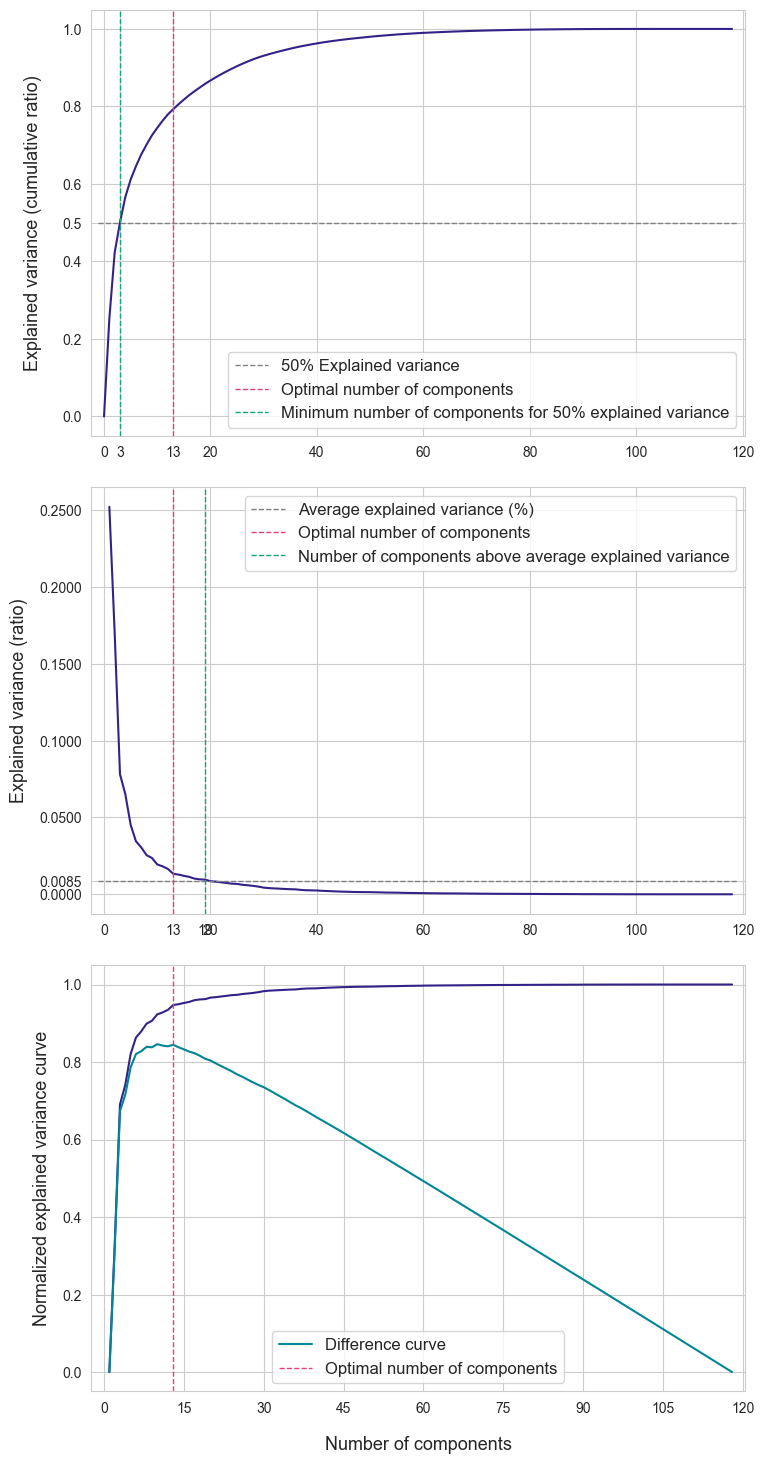

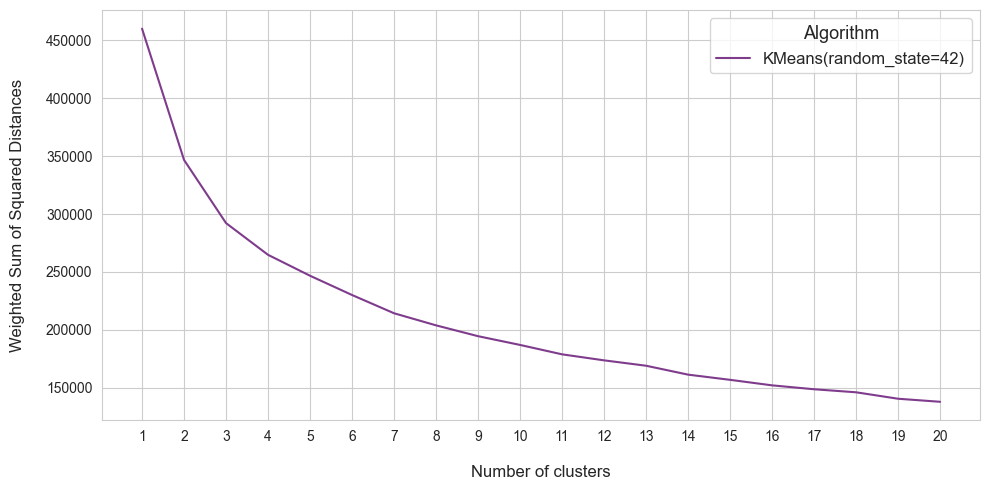

In [14]:
if DimensioreductionPCA:
    from clearn.dimensionality_reduction import DimensionalityReduction
    dr = DimensionalityReduction(datapd, num_vars=datapd.columns, cat_vars=None, num_algorithm='pca', cat_algorithm='mca', num_kwargs=None, cat_kwargs=None)
    dfPCA = dr.transform(n_components=None, min_explained_variance_ratio=None)
    dr.plot_num_explained_variance(thres=0.5, output_path=None, savefig_kws=None)
    
    reduced_data = dfPCA.values

    from clearn.clustering import Clustering
    cl = Clustering(dfPCA, normalize=False)
    dffc = cl.compute_clusters(n_clusters=None, metric='inertia', max_clusters=20, prefix=None, weights=None)
    cl.plot_score_comparison(output_path=None, savefig_kws=None)
    best = list(set(dffc))[-1]
    print(best)
    
elif DimensioreductionAE  == True:
    reduced_data = x_proj
else:
    reduced_data = x_train

def elbowmethod(x_trainPCA ,num_clusters_list):

        inertias = []
        # Calcular la inercia para diferentes números de clusters
        for num_clusters in num_clusters_list:
            kmeans = KMeans(
            n_clusters=num_clusters,
            n_init=100,
            init = 'k-means++',
            random_state = 42
            )
            kmeans.fit(x_trainPCA)
            inertias.append(kmeans.inertia_)

        # Plotear la curva del codo
        plt.figure(figsize=(8, 6))
        plt.plot(num_clusters_list, inertias, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        plt.title('Elbow method for finding the best K')
        plt.xticks(num_clusters_list)
        plt.grid(True)
        plt.show()

    # Función para plotear los resultados en 2D usando PCA para reducir la dimensionalidad
def reducedimenssion(data, tsne = False):

    if data.shape[1]>2:
        if tsne ==  True:
            tsne = TSNE(n_components=2,perplexity=55, random_state=42)
            reduced_data = tsne.fit_transform(x_train)
        else:
            pca = PCA(n_components=2)
            reduced_data = pca.fit_transform(data)
            explained_variance_ratio = pca.explained_variance_ratio_
            cumulative_explained_variance = np.cumsum(explained_variance_ratio)
            print(f"Cumulative Explained Variance: {cumulative_explained_variance}")
    else:
        if tsne ==  True:
            tsne = TSNE(n_components=2,perplexity=55, random_state=42)
            reduced_data = tsne.fit_transform(x_train)
        else:   
            reduced_data = data

    return reduced_data
def Kmeans(x_trainPCA, num_clusters_list, clusters_dbscanB = False, clusters_hcB = False, clusters_scB = False, tsne = False, metric = None, paramDBScan = None):
    from sklearn.metrics import davies_bouldin_score
    from sklearn.metrics import calinski_harabasz_score
    cluster_results = []
    # Clusterization with different numbers of clusters
    for num_clusters in num_clusters_list:
        print(num_clusters)

        # Seed of 10 for reproducibility.
        kmeans = KMeans(n_clusters=num_clusters,
                       max_iter=10_000,
                       n_init=100,
                       init='k-means++',
                       random_state=42)

        # Select the appropriate clustering algorithm
        if clusters_dbscanB:
            cluster_labels = DBSCAN(eps=paramDBScan[0], min_samples=paramDBScan[1]).fit_predict(x_trainPCA)
        elif clusters_hcB:
            cluster_labels = AgglomerativeClustering(n_clusters=num_clusters,
                                                     linkage='ward').fit_predict(x_trainPCA)
        elif clusters_scB:
            cluster_labels = SpectralClustering(n_clusters=num_clusters,
                                               affinity='nearest_neighbors').fit_predict(x_trainPCA)
        else:
            # K-means++ with alternative distance metrics
            if metric in locals():
                kmeans.set_params(metric=metric)
            cluster_labels = kmeans.fit_predict(x_trainPCA)

        # Add new clustering algorithms here

        cluster_results.append(cluster_labels)

        if clusters_dbscanB:
            num_clusters = len(set(cluster_labels))
            iterable = set(cluster_labels)
        else:
            num_clusters = len(set(cluster_labels))
            iterable = range(num_clusters)
            
        # Calculate and print evaluation metrics
        silhouette_avg = silhouette_score(x_trainPCA, cluster_labels)
        print(f"For num_clusters = {num_clusters}, The average silhouette_score is: {silhouette_avg:.4f}")
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(x_trainPCA, cluster_labels)

        # if not clusters_dbscanB and not clusters_hcB and not clusters_scB:
        # Calculate Davies-Bouldin and Calinski-Harabasz indices only for KMeans
        metric1 = davies_bouldin_score(x_trainPCA, cluster_labels)
        metric2 = calinski_harabasz_score(x_trainPCA, cluster_labels)
        metric3 = calinski_harabasz_score(x_trainPCA, cluster_labels, compactness_=True)
        print(f"Davies-Bouldin index: {metric1:.4f}")
        print(f"Calinski-Harabasz index: {metric2:.4f}")
        print(f"Compactness: {metric3:.4f}")
        
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(14, 5)
        ax1.set_xlim([-0.1, 1])

        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(x_trainPCA) + (num_clusters + 1) * 10])


        y_lower = 10
        
        for i in iterable:
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            if i<0:
                color = 'red'
            else:
                color = cm.nipy_spectral(float(i) / num_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.8,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        X2d = reducedimenssion(x_trainPCA, tsne = tsne)

        colors = cm.nipy_spectral(cluster_labels.astype(float) / num_clusters)

        ax2.scatter(
            X2d[:, 0], X2d[:, 1], marker=".", s=40, lw=0, alpha=0.8, c=colors, edgecolor="k"
        )

        if tsne == False:
            # Labeling the clusters
            centers = kmeans.cluster_centers_
            # Draw white circles at cluster centers
            ax2.scatter(
                centers[:, 0],
                centers[:, 1],
                marker="o",
                c="white",
                alpha=1,
                s=200,
                edgecolor="k",
            )

            for i, c in enumerate(centers):
                ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with num_clusters = %d"
            % num_clusters,
            fontsize=14,
            fontweight="bold",
        )
        if  clusters_dbscanB:
            print(set(cluster_labels))
            break

    plt.show()

    return cluster_results

2
For num_clusters = 2, The average silhouette_score is: 0.2364
Davies-Bouldin index: 1.6699
Calinski-Harabasz index: 1740.8546
Compactness: 0.1562
Cumulative Explained Variance: [0.31832063 0.53310121]
3
For num_clusters = 3, The average silhouette_score is: 0.2290
Davies-Bouldin index: 1.5805
Calinski-Harabasz index: 1529.7914
Compactness: 0.1783
Cumulative Explained Variance: [0.31832063 0.53310121]
4
For num_clusters = 4, The average silhouette_score is: 0.2045
Davies-Bouldin index: 1.6001
Calinski-Harabasz index: 1308.6491
Compactness: 0.1971
Cumulative Explained Variance: [0.31832063 0.53310121]
5
For num_clusters = 5, The average silhouette_score is: 0.1996
Davies-Bouldin index: 1.7141
Calinski-Harabasz index: 1150.5523
Compactness: 0.2150
Cumulative Explained Variance: [0.31832063 0.53310121]
6
For num_clusters = 6, The average silhouette_score is: 0.1837
Davies-Bouldin index: 1.8202
Calinski-Harabasz index: 1063.8220
Compactness: 0.2243
Cumulative Explained Variance: [0.318320

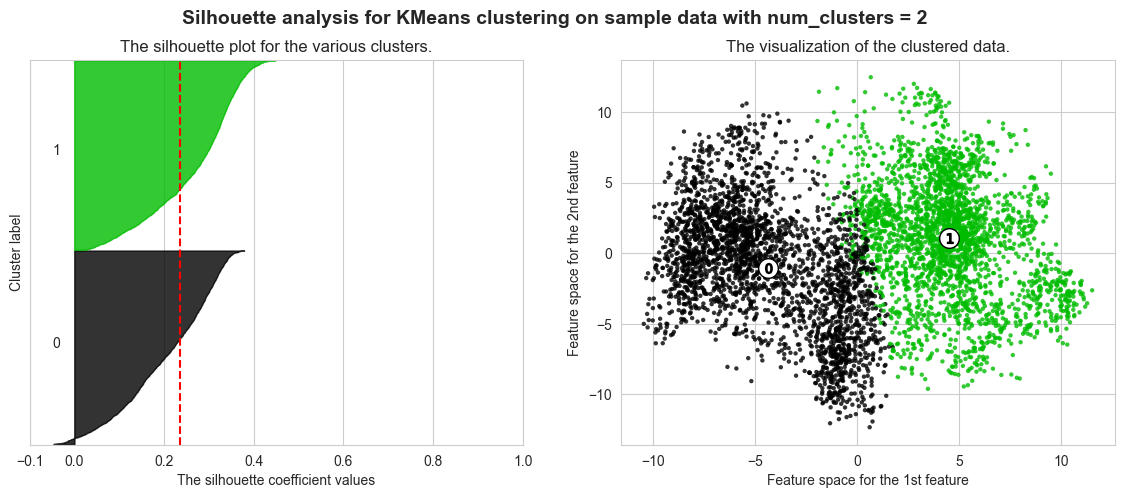

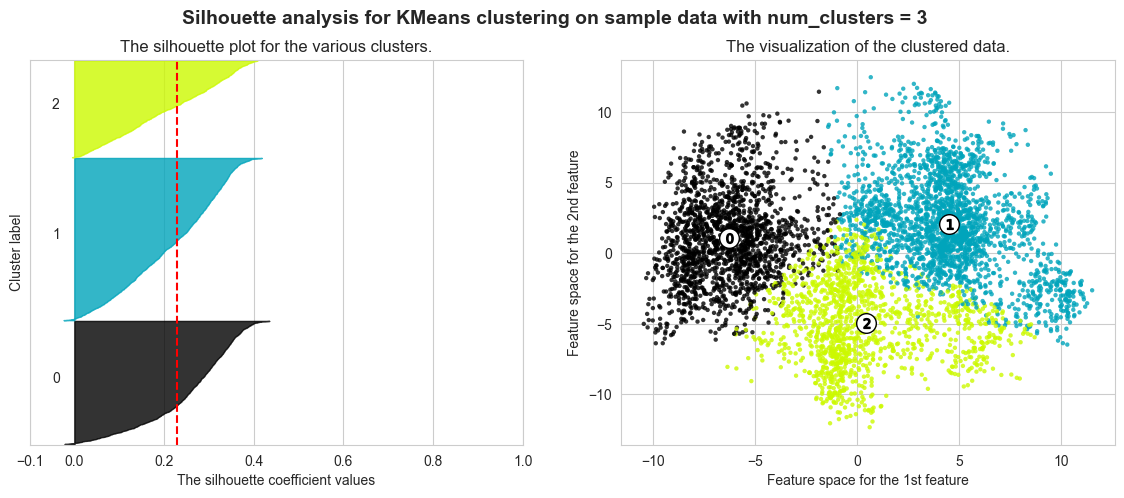

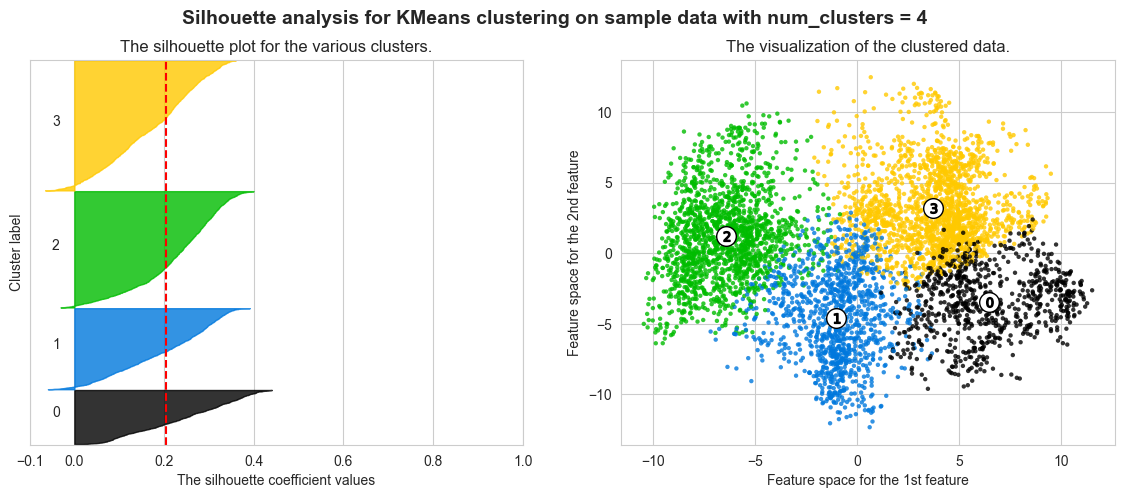

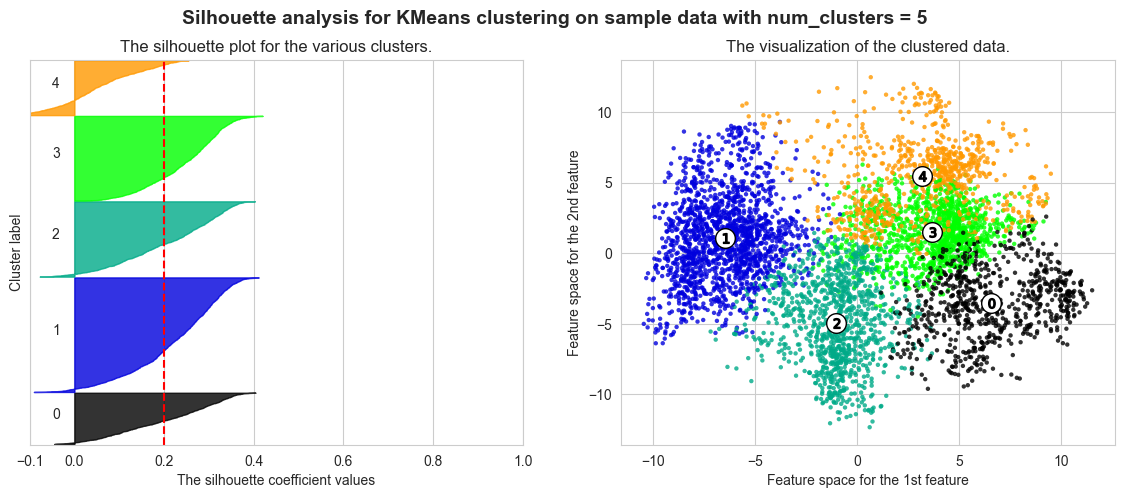

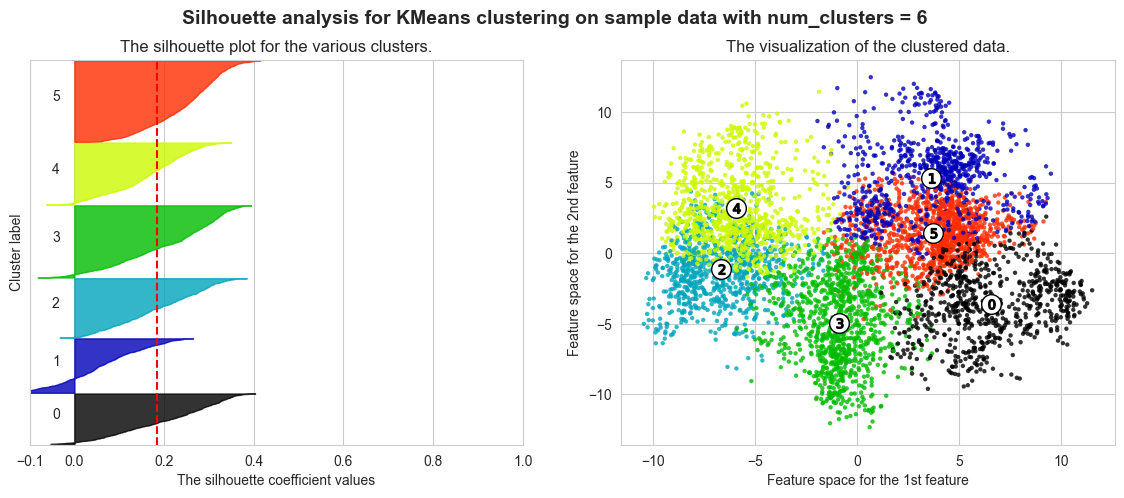

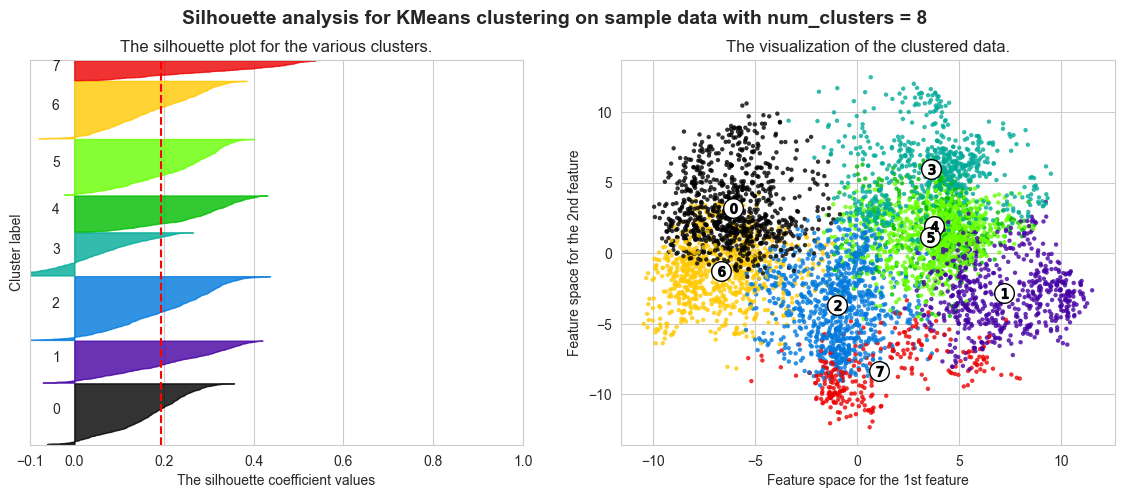

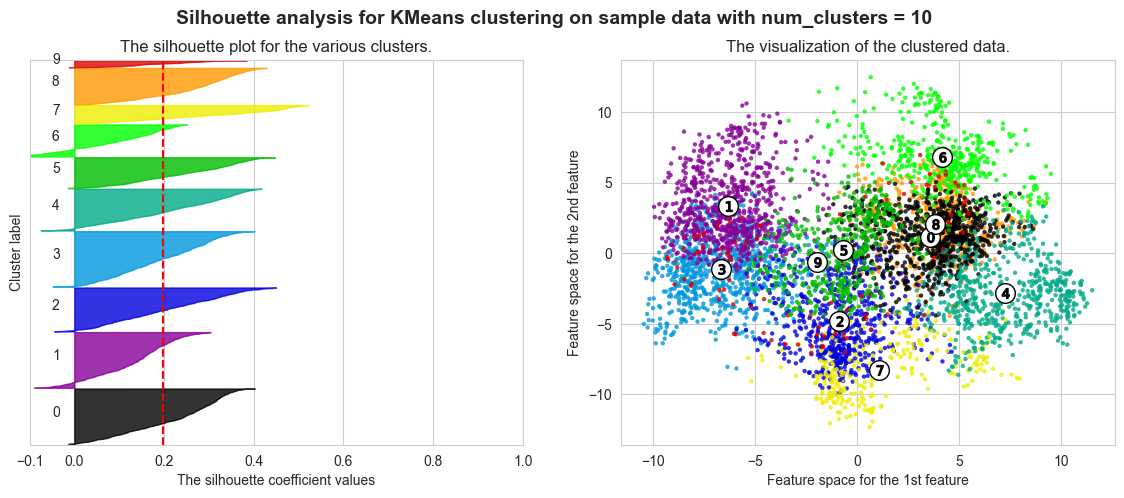

In [15]:
clusters = Kmeans(reduced_data, num_clusters_list = [2,3,4,5,6,8,10], clusters_dbscanB = False, clusters_hcB = False, clusters_scB = False, tsne = showTSNEoncluster, metric='euclidean',  paramDBScan = [0.5, 500])

In [16]:
dfanalise.columns

Index(['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV', 'OV condition',
       'UV condition', '% L1_500up', 'Mvar:Losses_500up', '% L1_500down',
       'Mvar:Losses_500down', 'PG_MW', 'QG_MVAR', 'PL_MW', 'QL_MVAR',
       'Shunt_Ind', 'Shunt_Cap', 'SHUNT_INST_IND', 'SHUNT_INST_CAP',
       'ReservaIND', 'ReservaCAP', 'PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL',
       'PG_BIO', 'PG_Dist', 'QG/QL', 'PG/PL', 'ReservaINDshunt',
       'ReservaCAPshunt', '% L1_Trafo', 'Mvar:Losses_Trafo', 'PI_mva', 'PFI'],
      dtype='object')

# Avaliação de Clusters

In [17]:
Cluster = clusters[1]
Clustersdf = pd.DataFrame(Cluster, index=datapd.index, columns = ['Cluster'])
Clustersdf['Cluster'] = Clustersdf['Cluster'].astype(str)
print(set(Cluster))
ClusterEvaluation = True
columns2 = ['PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL', 'PG_BIO', 'PL_MW', 'PG_MW','OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV','PI_mva', 'PFI']
# columns2 = ['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV','PI_mva', 'PFI']
# columns2 = []
datapd2 = flatdataframe(dfanalise, cenario, region, columns2, ACDCflux = True, Reserva=False, DPI=False, IndiceGroup=True, InfoPO=True, PImva_reg_nt=False, PImva=True)
datapd2.shape

{0, 1, 2}


C:\Users\david\AppData\Local\Temp\ipykernel_18388\3197969446.py:51: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = [df_reordered_sorted.loc[i].values.flatten() for i in conjunto_filtros]


(5325, 93)

C:\Users\david\AppData\Local\Temp\ipykernel_18388\508956043.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


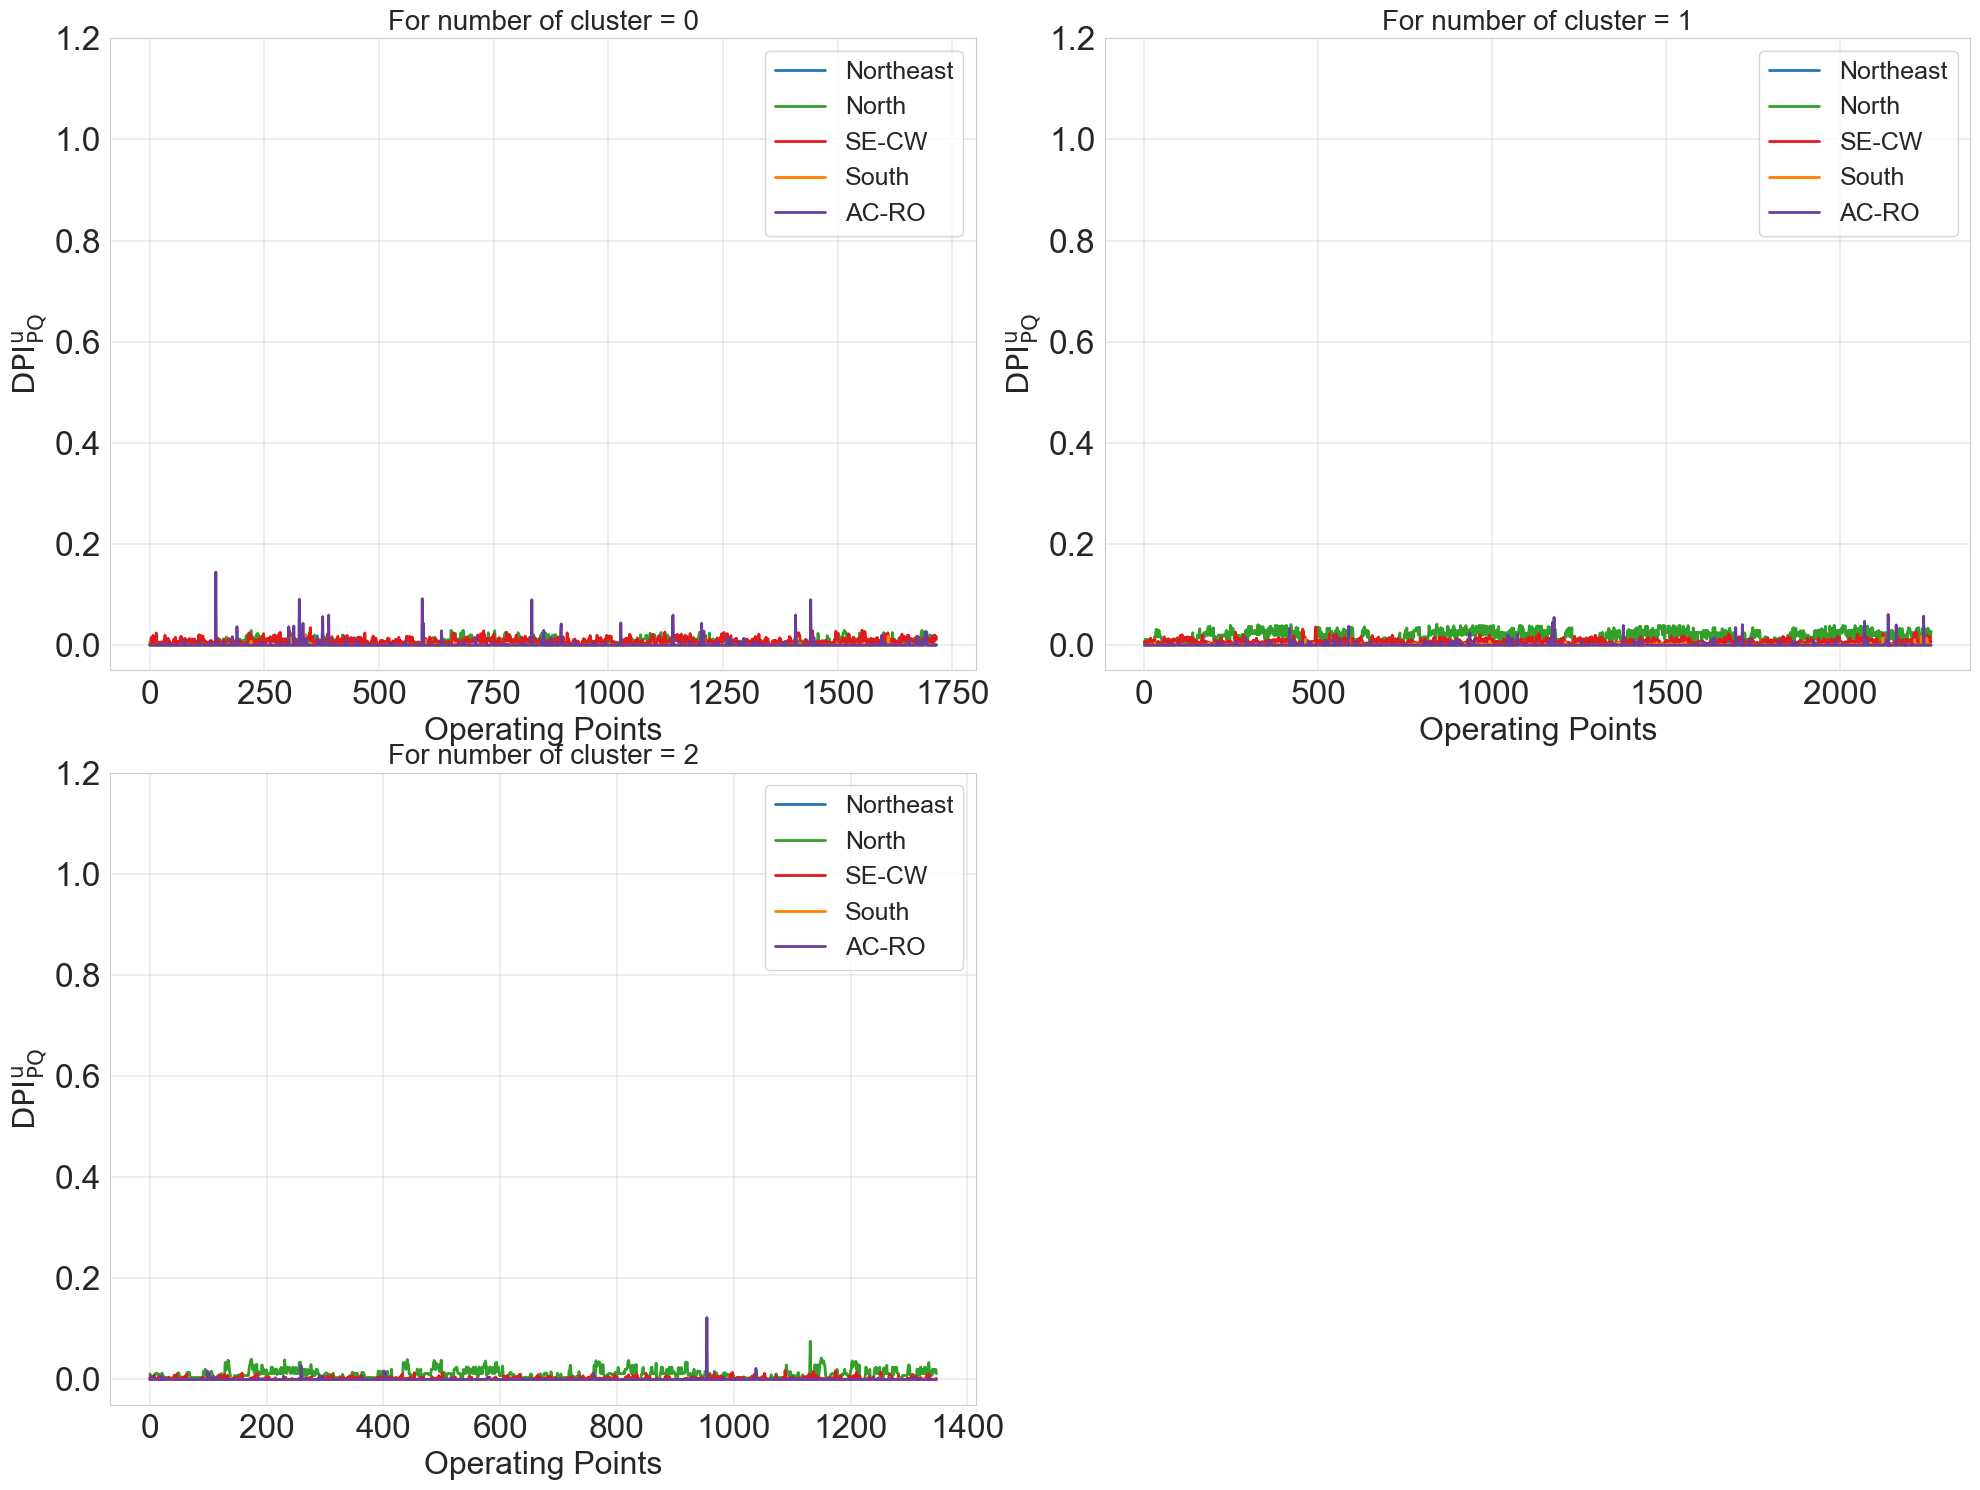

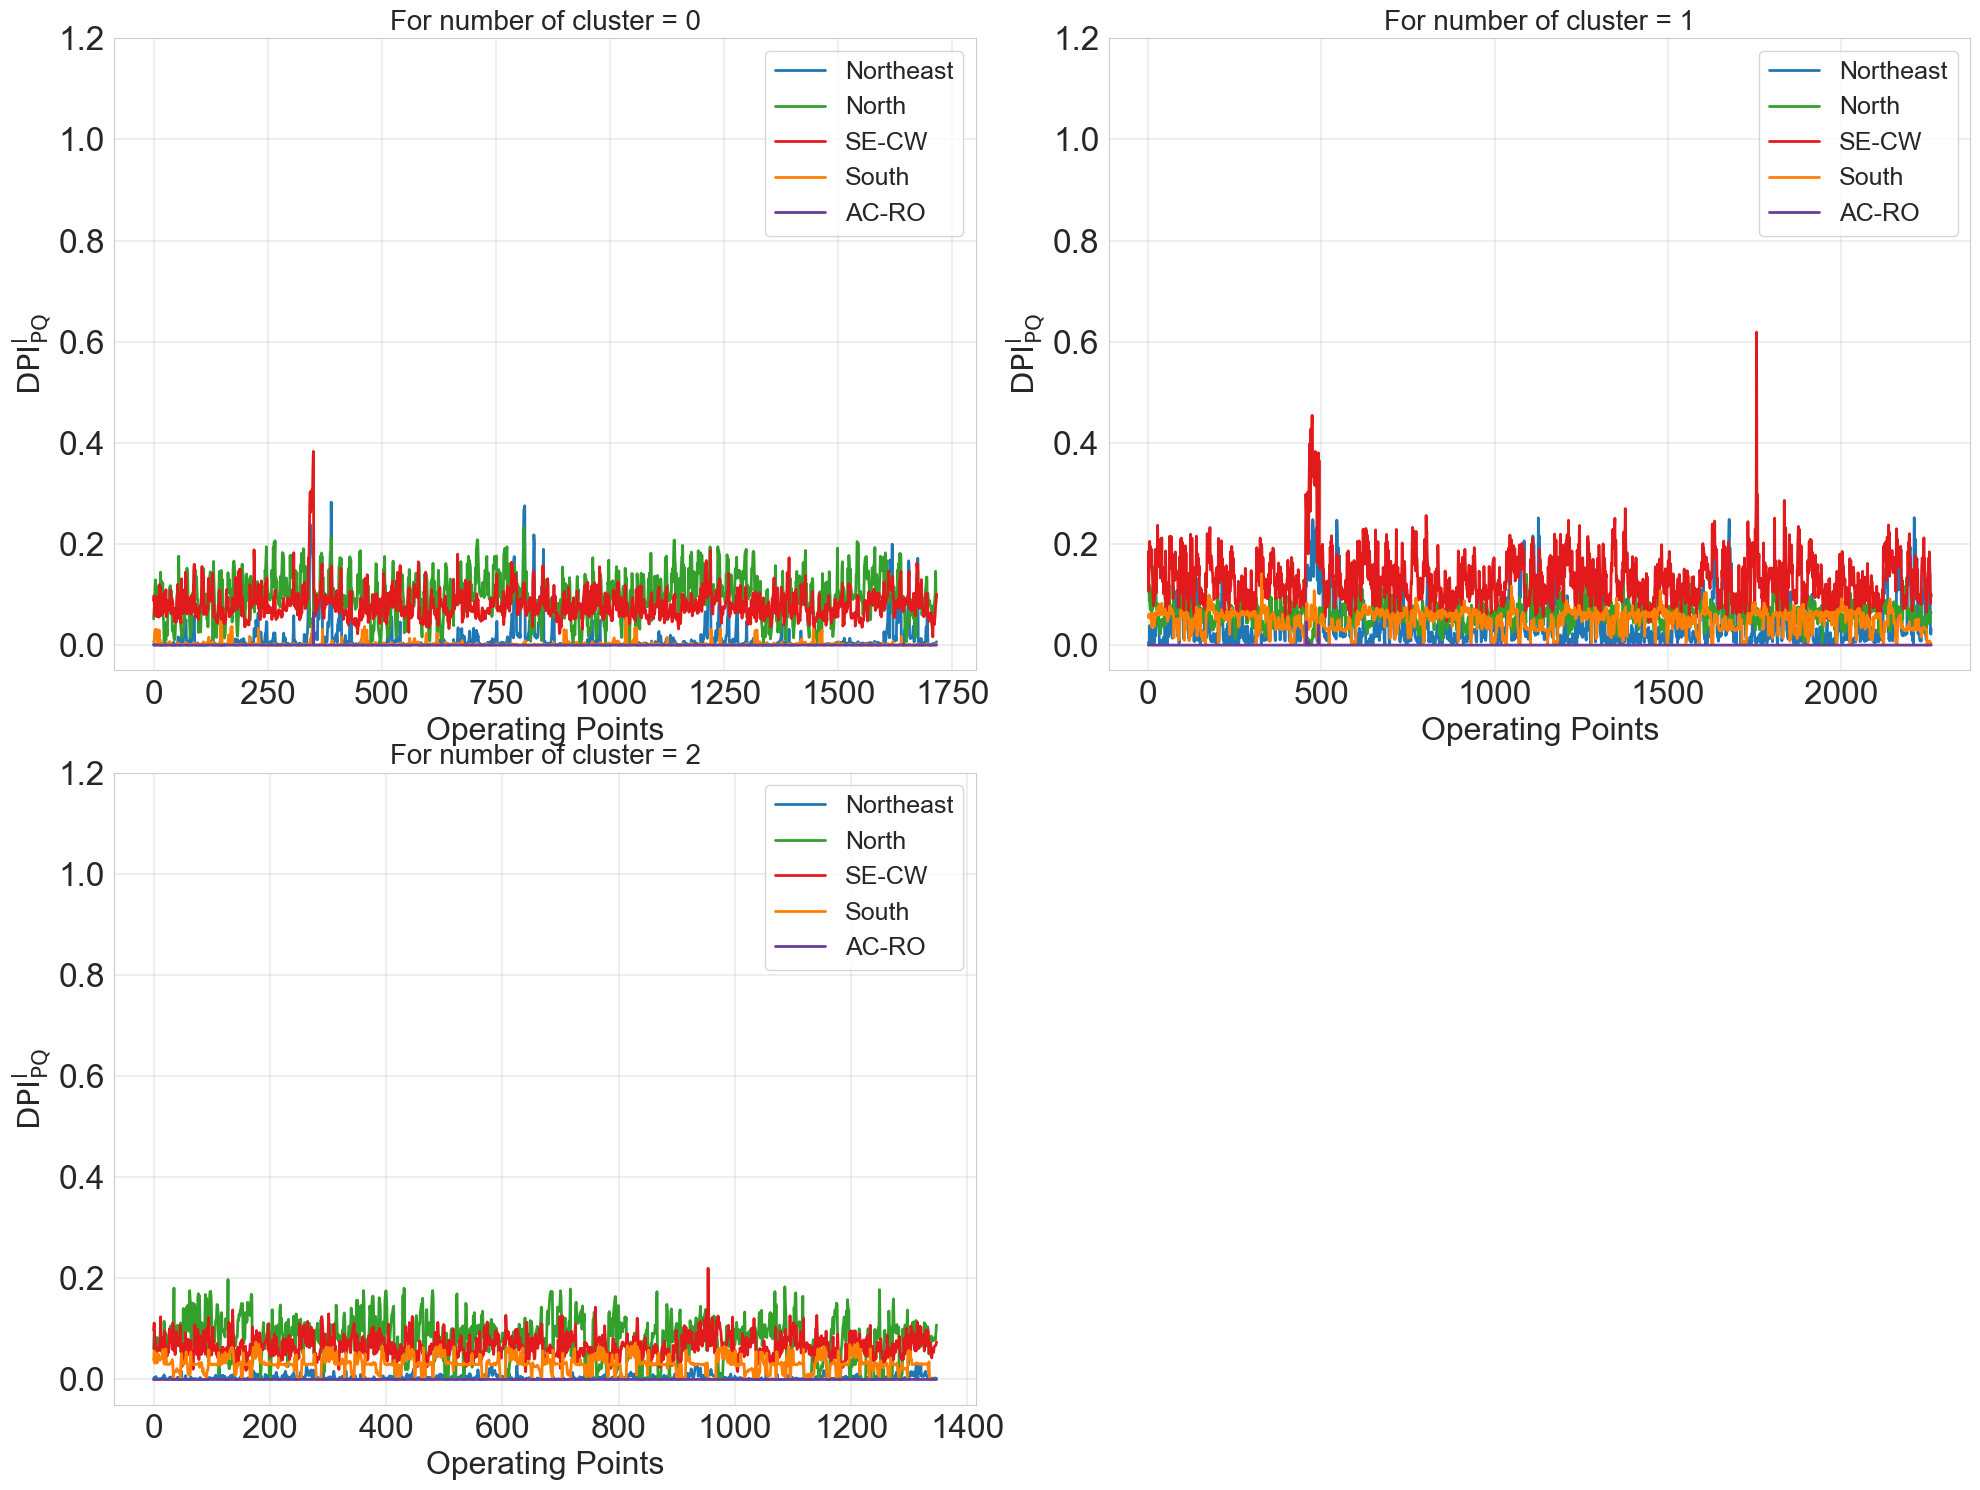

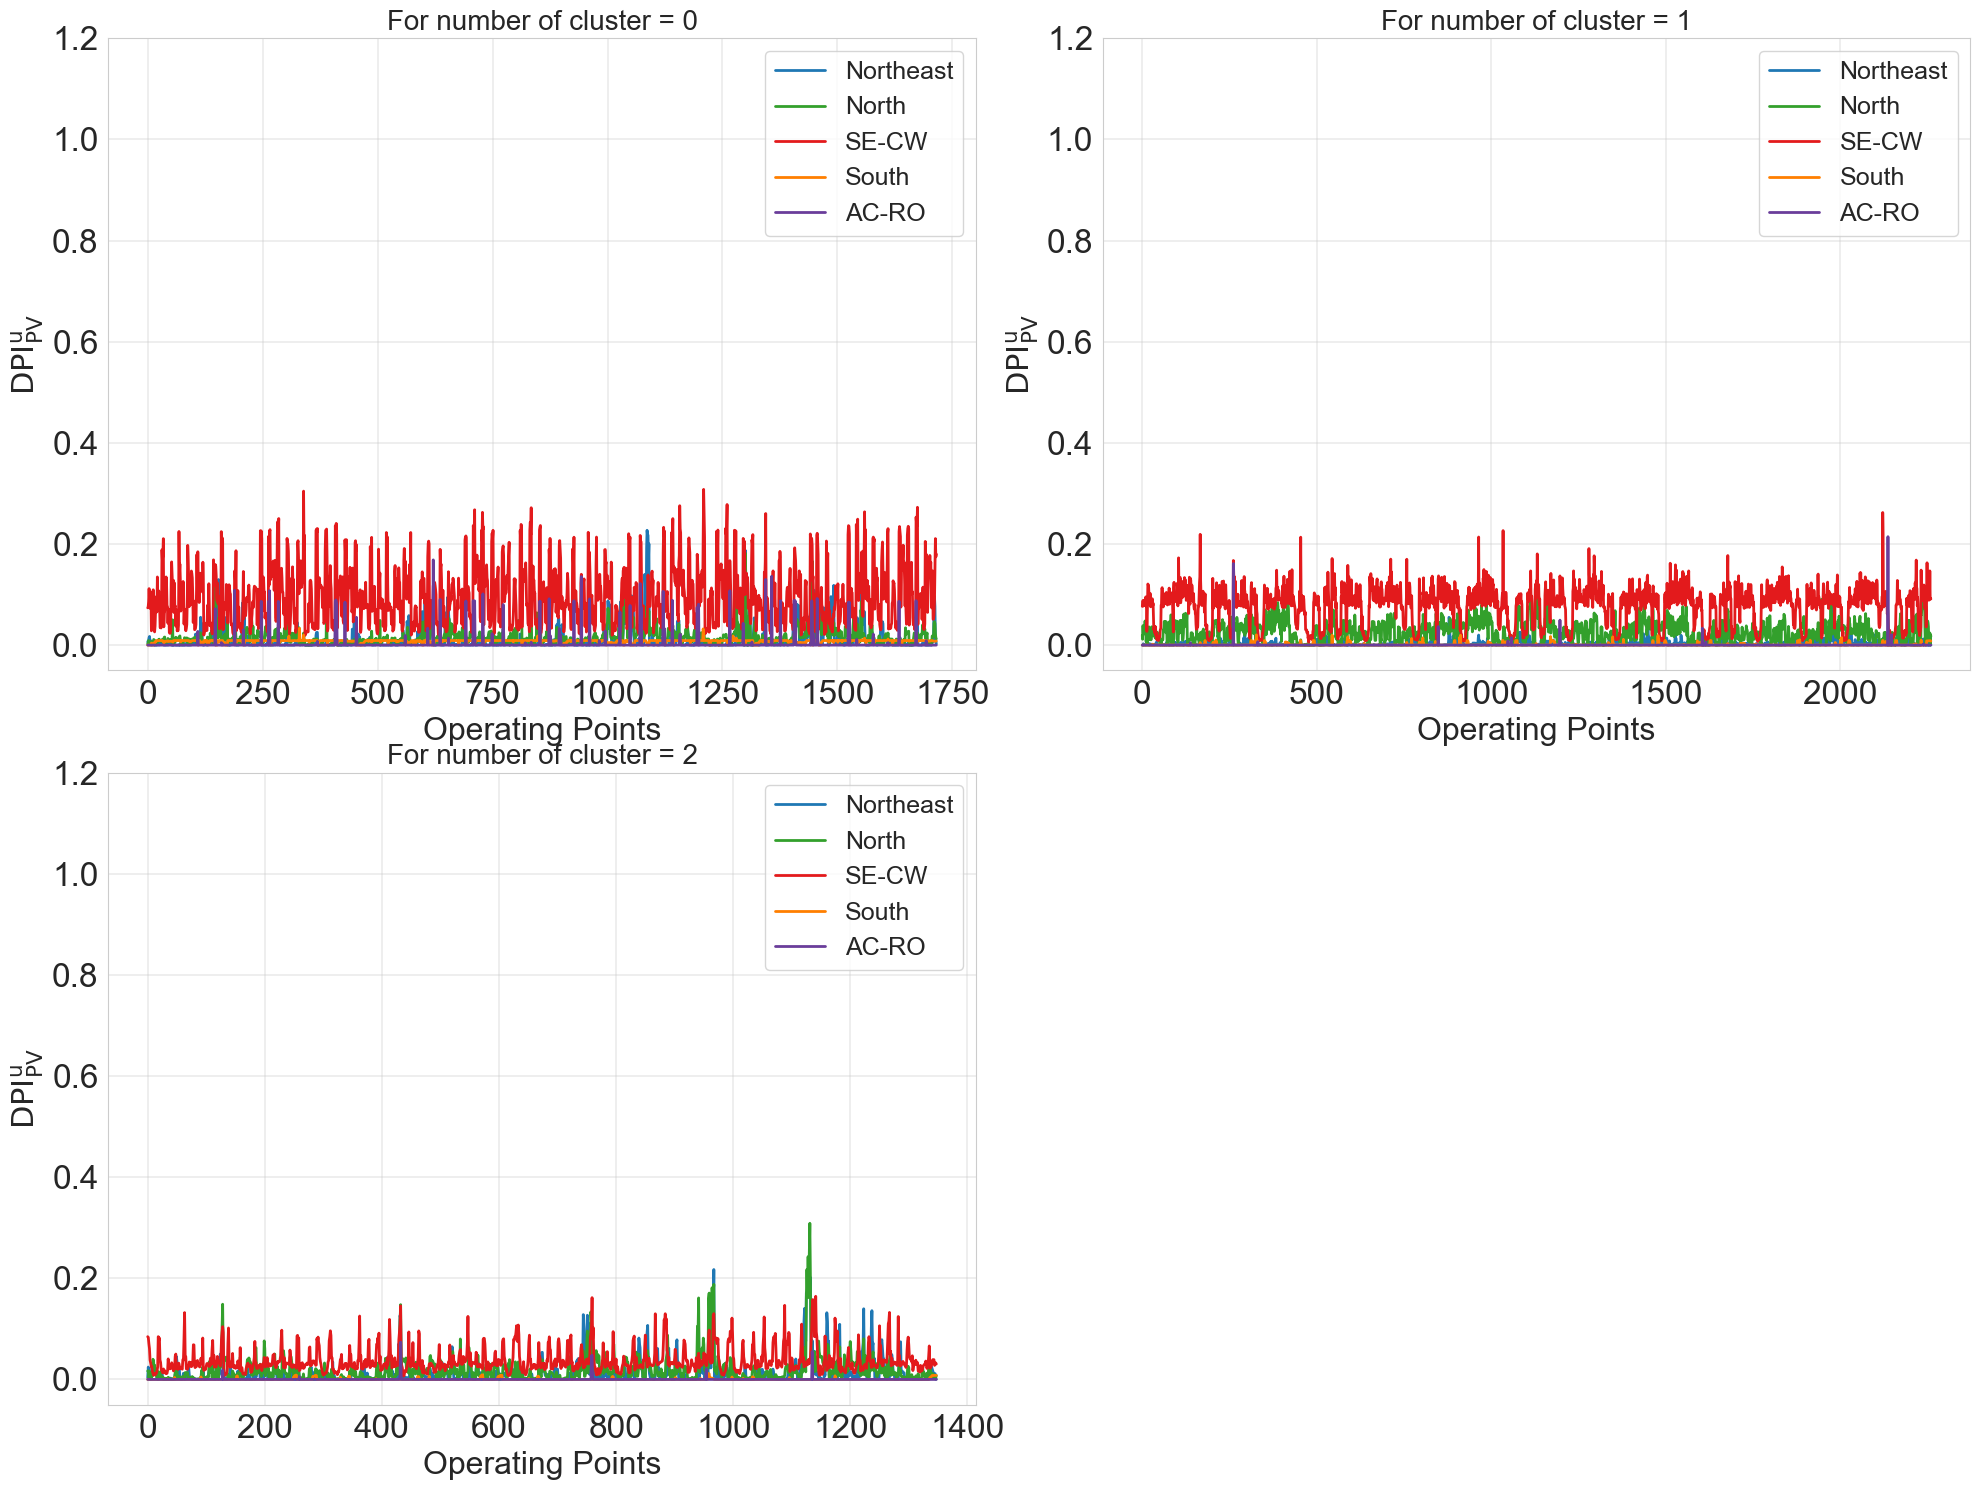

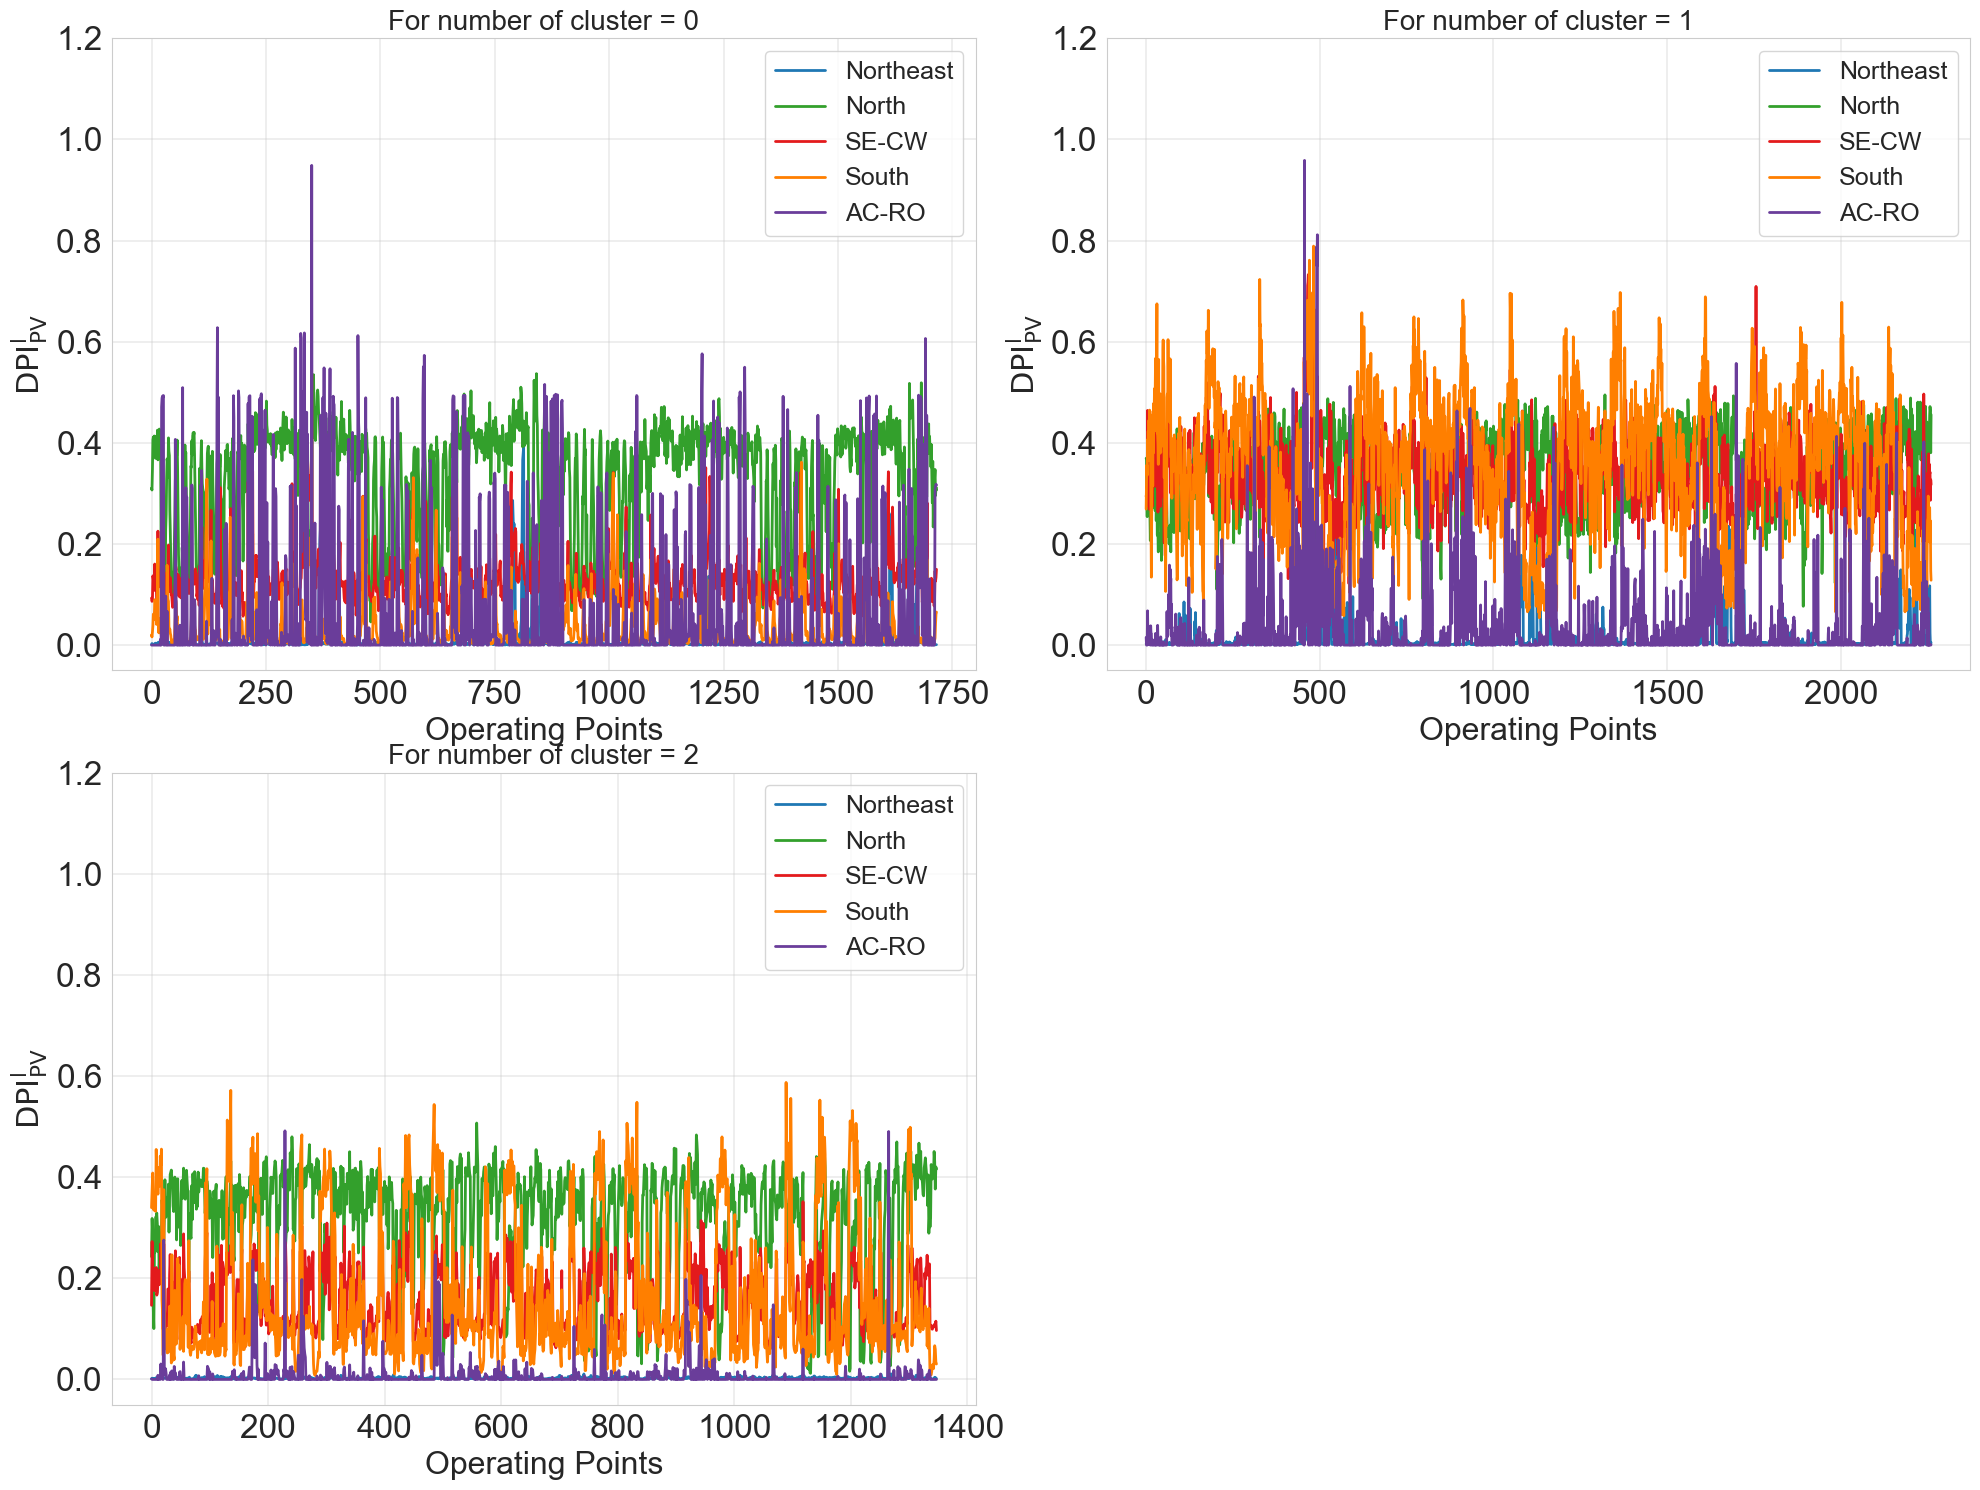

In [18]:
# ========================= Analise do DPI nos diferentes clusters ===============================
if region != 'PO':
    df = dfanalise
    if cenario == 'all':
        df_indice_cluster = df[['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV']].reset_index().merge(Clustersdf, on = ['Dia','Hora', 'Cenario'], how = 'left') # descomentar para analis de todos os cenarios
        df_indice_cluster = df_indice_cluster.set_index(['Dia','Hora','REG','Cenario'])# descomentar para analis de todos os cenarios
    else:
        if type(cenario) == list:
            df_indice_cluster = df.loc[:,:,:, cenario][['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV']].reset_index().merge(Clustersdf, on = ['Dia','Hora','Cenario'], how = 'left')
            df_indice_cluster = df_indice_cluster.set_index(['Dia','Hora','REG','Cenario'])
        else:
            df_indice_cluster = df.loc[:,:,:, cenario][['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV']].reset_index().merge(Clustersdf, on = ['Dia','Hora'], how = 'left')
            df_indice_cluster = df_indice_cluster.set_index(['Dia','Hora','REG'])

    if region != 'all':
        df_indice_cluster = df_indice_cluster.loc[:,:,region]
    # =============================================================================================
    num_clusters = df_indice_cluster['Cluster'].unique().size
    rows = int(np.ceil(np.sqrt(num_clusters)))
    cols = int(np.ceil(num_clusters / rows))

    indicedic = {'DPI_(u)_PQ':['OV DPI_PQ',r'$\mathrm{DPI}_\mathrm{PQ}^\mathrm{u}$'],
                'DPI_(l)_PQ': ['UV DPI_PQ',r'$\mathrm{DPI}_\mathrm{PQ}^\mathrm{l}$'],
                'DPI_(u)_PV':['OV DPI_PV',r'$\mathrm{DPI}_\mathrm{PV}^\mathrm{u}$'],
                'DPI_(l)_PV': ['UV DPI_PV', r'$\mathrm{DPI}_\mathrm{PV}^\mathrm{l}$']}

    # =============================================================================================
    if region != 'all':
        fig, axs = plt.subplots(rows, cols, figsize=(15, 10))
        # Iterate through clusters and create plots
        for i, ax in enumerate(axs.flat):
            if i >= num_clusters:
                # If there are more subplots than clusters, turn off extra ones
                ax.axis('off')
                continue

            Condition = df_indice_cluster['Cluster']==str(i)
            plot_indice_dec(df_indice_cluster[Condition], '', 'indices', order=False, ylimites=[-0.05, 1.2],  ax=ax)
            ax.set_title(f'For number of cluster = {i}', fontsize=20)
        plt.show()
    else:
        # =============================================================================================
        for indices in indicedic.keys():
            fig, axs = plt.subplots(rows, cols, figsize=(20, 15))
            # Iterate through clusters and create plots
            for i, ax in enumerate(axs.flat):
                if i >= num_clusters:
                    # If there are more subplots than clusters, turn off extra ones
                    ax.axis('off')
                    continue

                Condition = df_indice_cluster['Cluster']==str(i)
                plot_indice_reg(df_indice_cluster[Condition], indicedic[indices][1], indices, '', indicedic[indices][0], order=False, ylimites=[-0.05, 1.2],  ax=ax)
                ax.set_title(f'For number of cluster = {i}', fontsize=20)
            plt.show()

In [19]:
# Initialize 'PL_Total' column to zeros
datapd2['PG_UHE_Total'] = 0
datapd2['PG_UTE_Total'] = 0
datapd2['PG_EOL_Total'] = 0
datapd2['PG_SOL_Total'] = 0
datapd2['PG_BIO_Total'] = 0
for col in datapd2.columns:
    if col.startswith('PG_UHE_') & ~col.endswith('_Total'):
        datapd2['PG_UHE_Total'] += datapd2[col]
    elif col.startswith('PG_UTE_') & ~col.endswith('_Total'):
        datapd2['PG_UTE_Total'] += datapd2[col]
    elif col.startswith('PG_EOL_') & ~col.endswith('_Total'):
        datapd2['PG_EOL_Total'] += datapd2[col]
    elif col.startswith('PG_SOL_') & ~col.endswith('_Total'):
        datapd2['PG_SOL_Total'] += datapd2[col]
    elif col.startswith('PG_BIO_') & ~col.endswith('_Total'):
        datapd2['PG_BIO_Total'] += datapd2[col]

if cenario == 'all':
    df = datapd2.merge(Clustersdf, on = ['Dia','Hora', 'Cenario'], how = 'left') # descomentar para analis de todos os cenarios
else:
    if type(cenario) == list:
        df = datapd2.merge(Clustersdf, on = ['Dia','Hora','Cenario'], how = 'left')
    else:
        df = datapd2.merge(Clustersdf, on = ['Dia','Hora',], how = 'left')

In [20]:
df.columns

Index(['PG_UHE_AC-RO', 'PG_UTE_AC-RO', 'PG_EOL_AC-RO', 'PG_SOL_AC-RO',
       'PG_BIO_AC-RO', 'PL_MW_AC-RO', 'PG_MW_AC-RO', 'OV DPI_PQ_AC-RO',
       'UV DPI_PQ_AC-RO', 'OV DPI_PV_AC-RO', 'UV DPI_PV_AC-RO', 'PI_mva_AC-RO',
       'PFI_AC-RO', 'PG_UHE_Northeast', 'PG_UTE_Northeast', 'PG_EOL_Northeast',
       'PG_SOL_Northeast', 'PG_BIO_Northeast', 'PL_MW_Northeast',
       'PG_MW_Northeast', 'OV DPI_PQ_Northeast', 'UV DPI_PQ_Northeast',
       'OV DPI_PV_Northeast', 'UV DPI_PV_Northeast', 'PI_mva_Northeast',
       'PFI_Northeast', 'PG_UHE_North', 'PG_UTE_North', 'PG_EOL_North',
       'PG_SOL_North', 'PG_BIO_North', 'PL_MW_North', 'PG_MW_North',
       'OV DPI_PQ_North', 'UV DPI_PQ_North', 'OV DPI_PV_North',
       'UV DPI_PV_North', 'PI_mva_North', 'PFI_North', 'PG_UHE_SE-CW',
       'PG_UTE_SE-CW', 'PG_EOL_SE-CW', 'PG_SOL_SE-CW', 'PG_BIO_SE-CW',
       'PL_MW_SE-CW', 'PG_MW_SE-CW', 'OV DPI_PQ_SE-CW', 'UV DPI_PQ_SE-CW',
       'OV DPI_PV_SE-CW', 'UV DPI_PV_SE-CW', 'PI_mva_SE-CW', 'PF

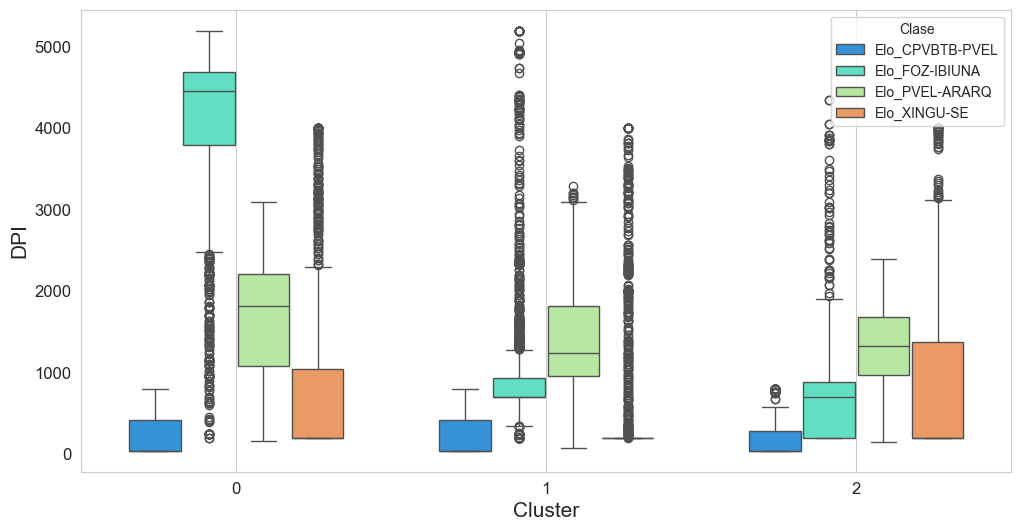

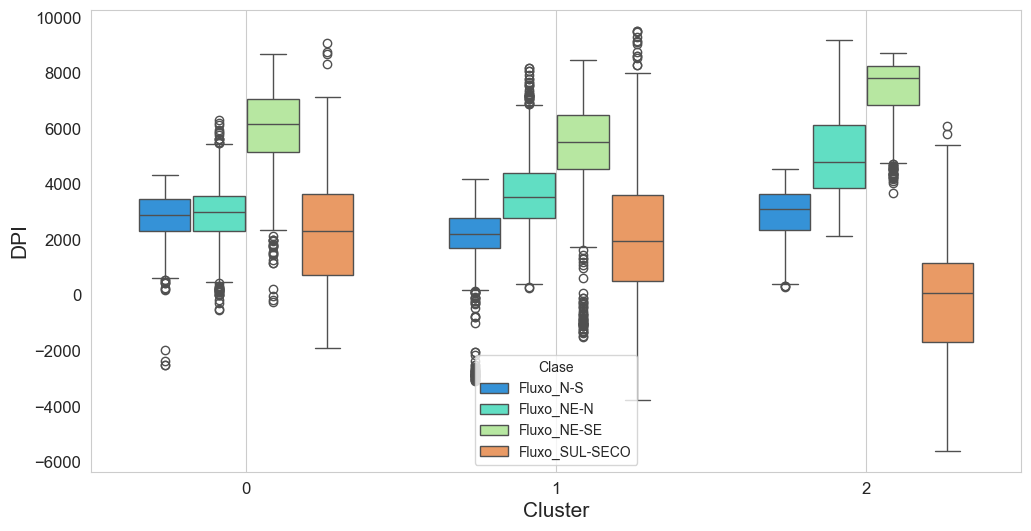

In [21]:
if ClusterEvaluation:
    dff = pd.melt(df[['Elo_FOZ-IBIUNA', 'Elo_PVEL-ARARQ', 'Elo_XINGU-SE','Elo_CPVBTB-PVEL','Cluster']], id_vars=['Cluster'], value_vars=['Elo_FOZ-IBIUNA', 'Elo_PVEL-ARARQ', 'Elo_XINGU-SE','Elo_CPVBTB-PVEL'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)
    dff = pd.melt(df[['Fluxo_N-S', 'Fluxo_NE-N', 'Fluxo_NE-SE', 'Fluxo_SUL-SECO','Cluster']], id_vars=['Cluster'], value_vars=['Fluxo_N-S', 'Fluxo_NE-N', 'Fluxo_NE-SE', 'Fluxo_SUL-SECO',], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

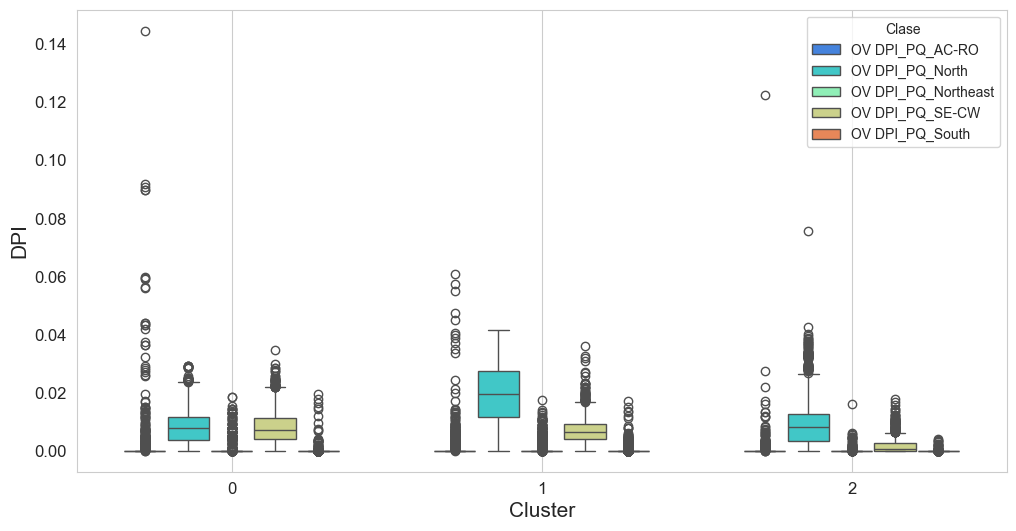

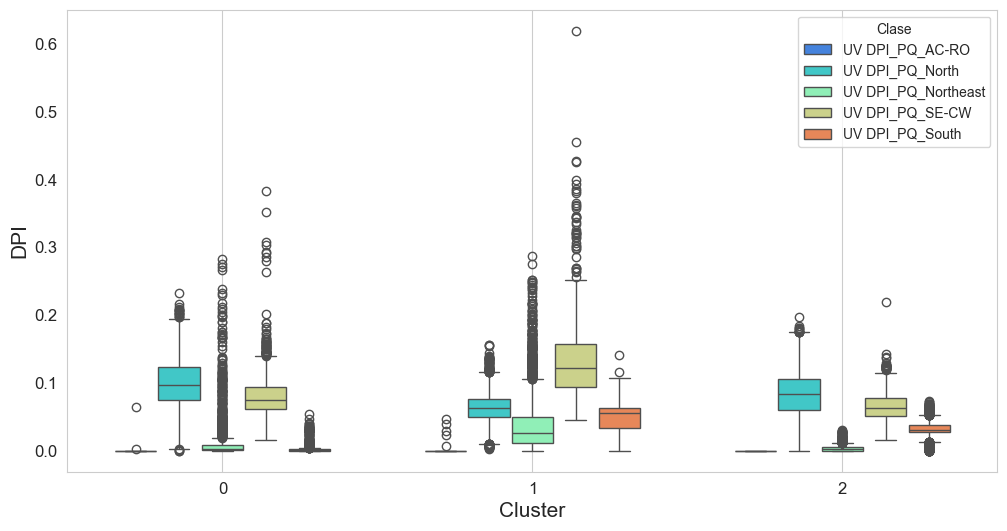

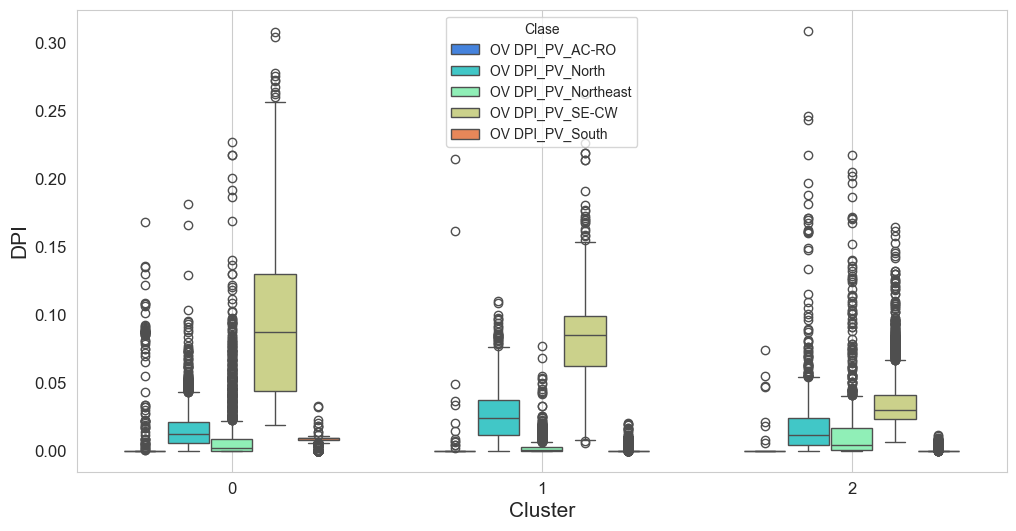

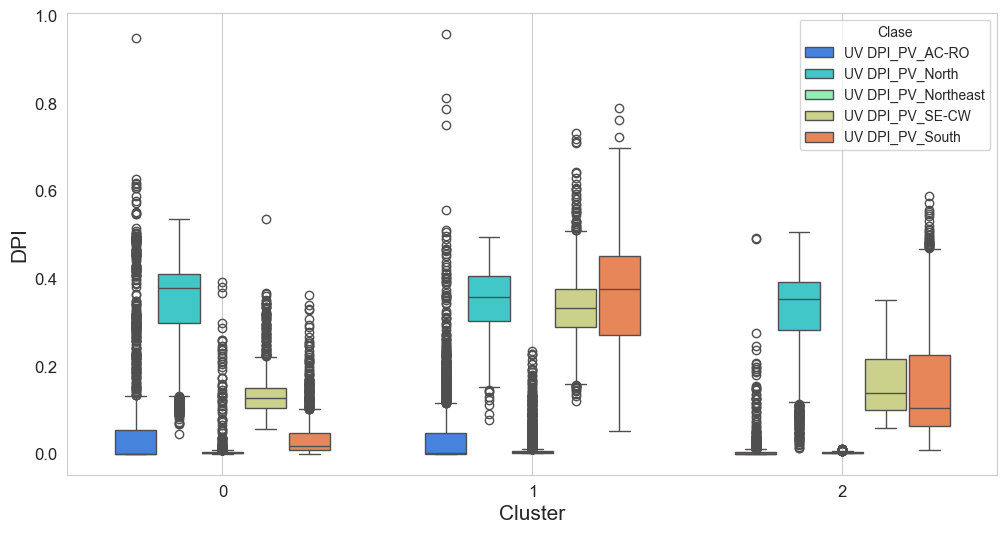

In [22]:
if ClusterEvaluation:
    dff = pd.melt(df[['OV DPI_PQ_AC-RO','OV DPI_PQ_Northeast', 'OV DPI_PQ_North', 'OV DPI_PQ_SE-CW', 'OV DPI_PQ_South','Cluster']], id_vars=['Cluster'], value_vars=['OV DPI_PQ_AC-RO','OV DPI_PQ_Northeast', 'OV DPI_PQ_North', 'OV DPI_PQ_SE-CW', 'OV DPI_PQ_South'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

    dff = pd.melt(df[['UV DPI_PQ_AC-RO', 'UV DPI_PQ_Northeast', 'UV DPI_PQ_North', 'UV DPI_PQ_SE-CW', 'UV DPI_PQ_South','Cluster']], id_vars=['Cluster'], value_vars=['UV DPI_PQ_AC-RO', 'UV DPI_PQ_Northeast', 'UV DPI_PQ_North', 'UV DPI_PQ_SE-CW', 'UV DPI_PQ_South',], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

    dff = pd.melt(df[['OV DPI_PV_AC-RO', 'OV DPI_PV_Northeast', 'OV DPI_PV_North', 'OV DPI_PV_SE-CW','OV DPI_PV_South' ,'Cluster']], id_vars=['Cluster'], value_vars=['OV DPI_PV_AC-RO', 'OV DPI_PV_Northeast', 'OV DPI_PV_North', 'OV DPI_PV_SE-CW','OV DPI_PV_South'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

    dff = pd.melt(df[['UV DPI_PV_AC-RO', 'UV DPI_PV_Northeast', 'UV DPI_PV_North', 'UV DPI_PV_SE-CW', 'UV DPI_PV_South','Cluster']], id_vars=['Cluster'], value_vars=['UV DPI_PV_AC-RO', 'UV DPI_PV_Northeast', 'UV DPI_PV_North', 'UV DPI_PV_SE-CW', 'UV DPI_PV_South'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)


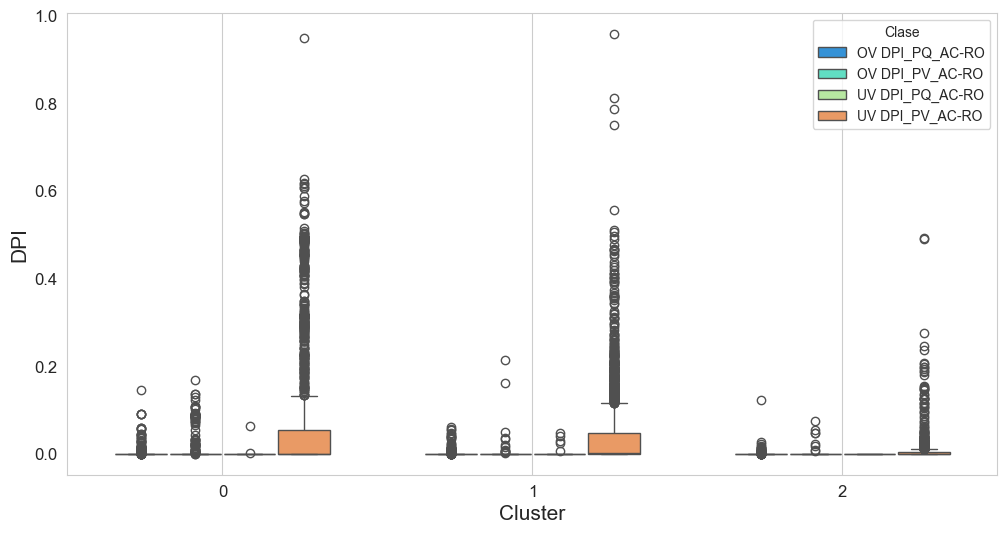

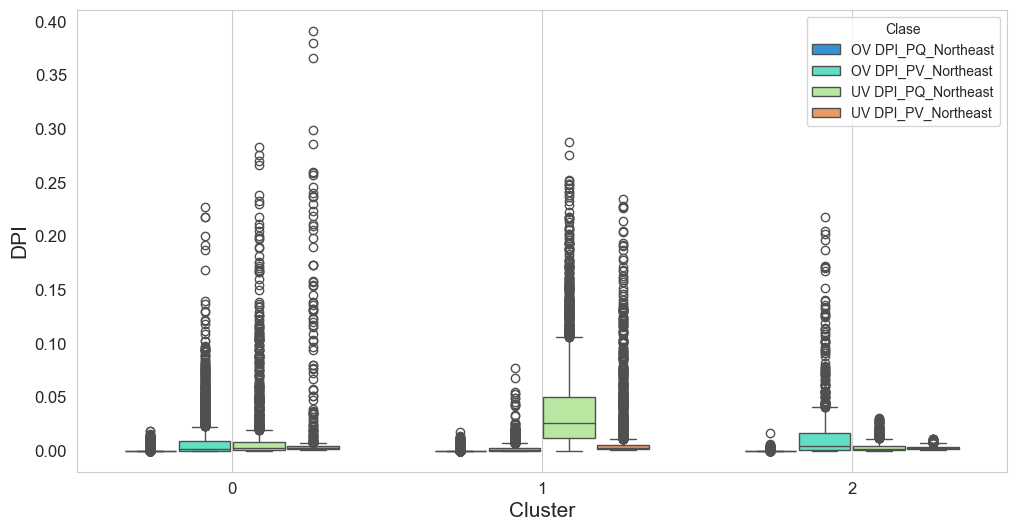

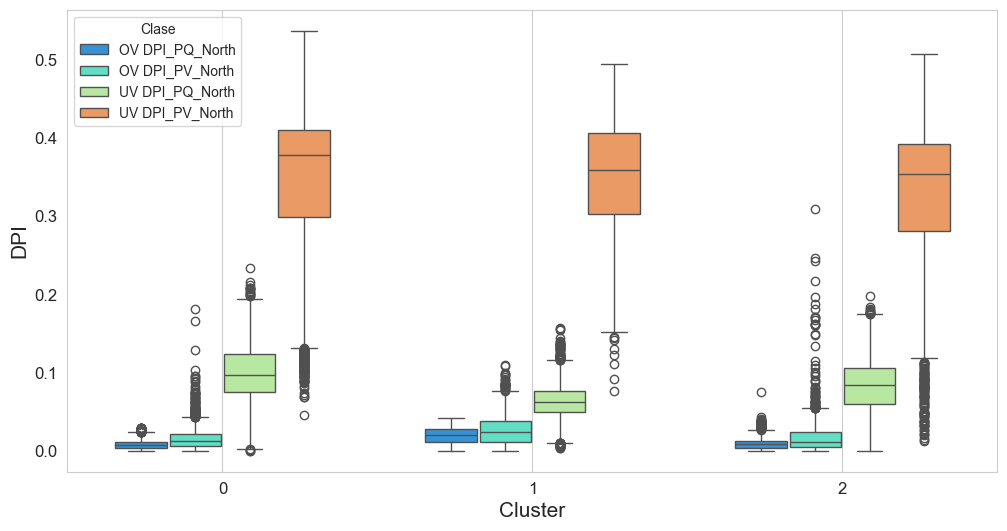

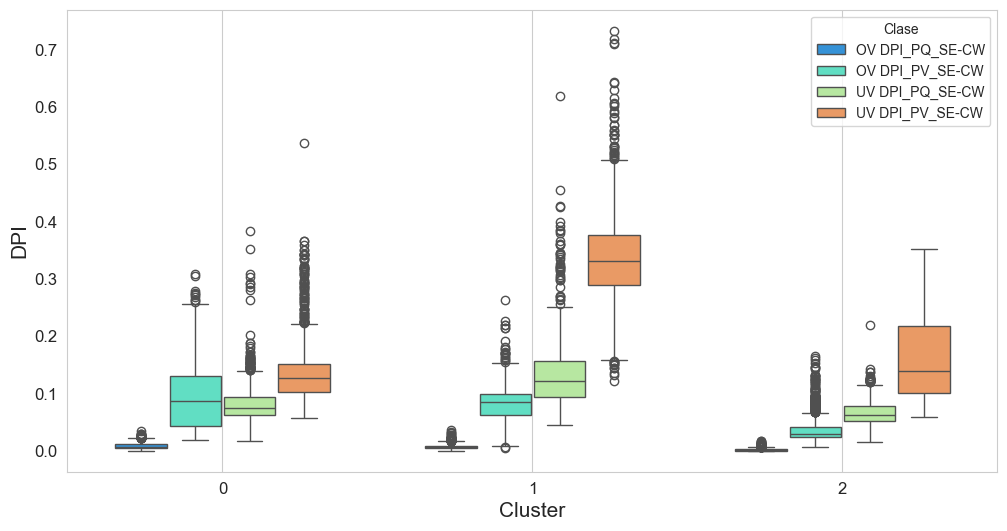

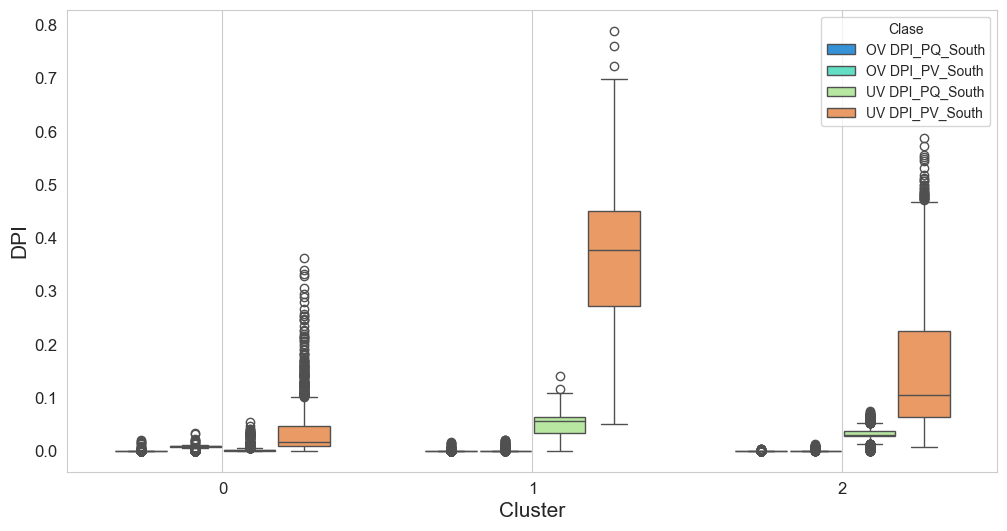

In [23]:
if ClusterEvaluation:
    dff = pd.melt(df[['OV DPI_PQ_AC-RO','UV DPI_PQ_AC-RO', 'OV DPI_PV_AC-RO', 'UV DPI_PV_AC-RO','Cluster']], id_vars=['Cluster'], value_vars=['OV DPI_PQ_AC-RO','UV DPI_PQ_AC-RO', 'OV DPI_PV_AC-RO', 'UV DPI_PV_AC-RO'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

    dff = pd.melt(df[['OV DPI_PQ_Northeast', 'UV DPI_PQ_Northeast', 'OV DPI_PV_Northeast', 'UV DPI_PV_Northeast','Cluster']], id_vars=['Cluster'], value_vars=['OV DPI_PQ_Northeast', 'UV DPI_PQ_Northeast', 'OV DPI_PV_Northeast', 'UV DPI_PV_Northeast'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

    dff = pd.melt(df[['OV DPI_PQ_North', 'UV DPI_PQ_North', 'OV DPI_PV_North', 'UV DPI_PV_North','Cluster']], id_vars=['Cluster'], value_vars=['OV DPI_PQ_North', 'UV DPI_PQ_North', 'OV DPI_PV_North', 'UV DPI_PV_North'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

    dff = pd.melt(df[['OV DPI_PQ_SE-CW', 'UV DPI_PQ_SE-CW', 'OV DPI_PV_SE-CW', 'UV DPI_PV_SE-CW','Cluster']], id_vars=['Cluster'], value_vars=['OV DPI_PQ_SE-CW', 'UV DPI_PQ_SE-CW', 'OV DPI_PV_SE-CW', 'UV DPI_PV_SE-CW'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

    dff = pd.melt(df[['OV DPI_PQ_South', 'UV DPI_PQ_South', 'OV DPI_PV_South', 'UV DPI_PV_South','Cluster']], id_vars=['Cluster'], value_vars=['OV DPI_PQ_South', 'UV DPI_PQ_South', 'OV DPI_PV_South', 'UV DPI_PV_South'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

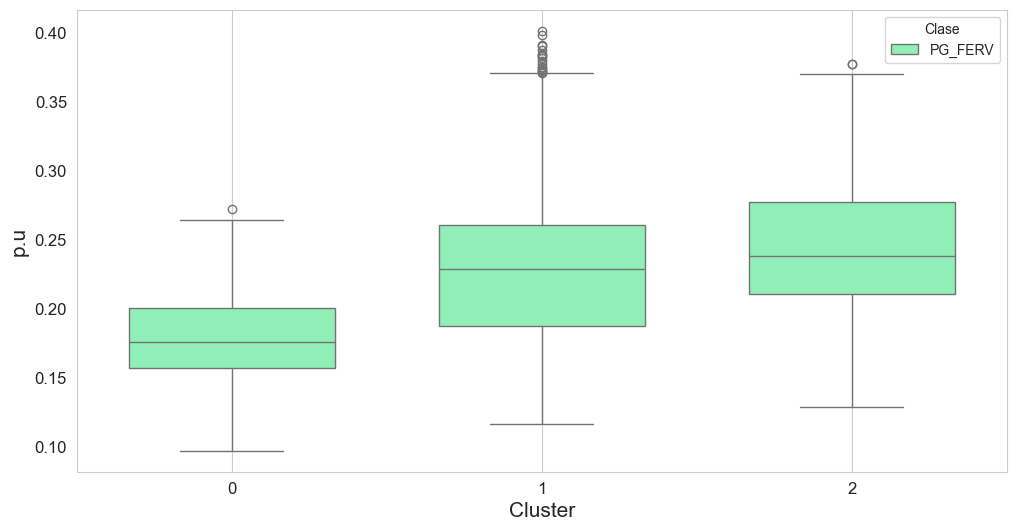

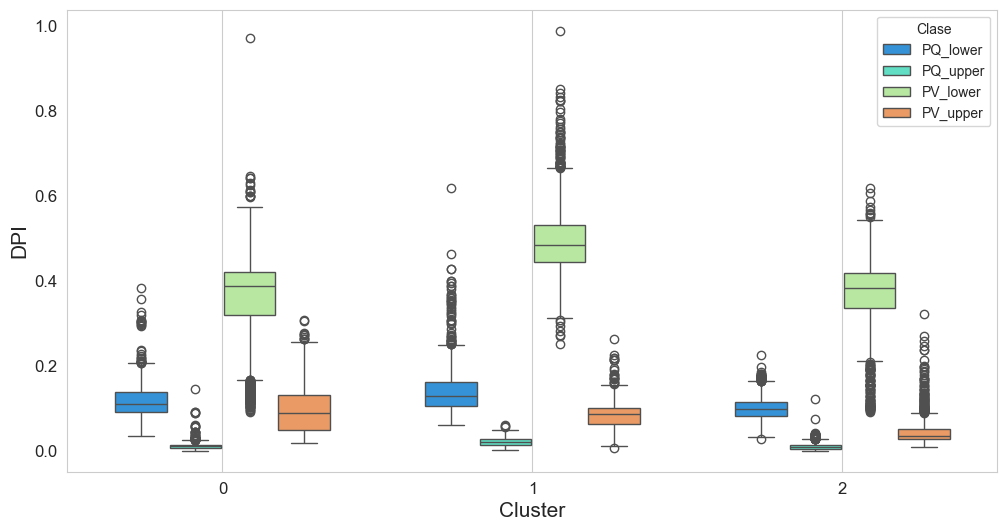

In [24]:
if ClusterEvaluation:
    dff = pd.melt(df[['PG_FERV','Cluster']], id_vars=['Cluster'], value_vars=['PG_FERV'], ignore_index = False).sort_values('Cluster')
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'p.u', 'variable', ylim = None,legendPos = False)
    dff = pd.melt(df[['PQ_lower', 'PV_lower','PQ_upper', 'PV_upper','Cluster']], id_vars=['Cluster'], value_vars=['PQ_lower', 'PV_lower','PQ_upper', 'PV_upper'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

In [25]:
if ClusterEvaluation:
    df['Cenario Hidrologico'] = df.index.to_frame()['Cenario'].apply(lambda x: x[:-3])
    dff = df[['Cenario Hidrologico','Cluster']].groupby(['Cenario Hidrologico','Cluster'])[['Cenario Hidrologico']].count().rename(columns={"Cenario Hidrologico": "count"}).sort_values('Cluster')
    fig = px.bar(dff.reset_index(), x="Cluster", y="count", color="Cenario Hidrologico", text_auto=True, color_continuous_scale='rainbow')
    fig.update_layout(
        title="",
        width=1000,  # Width of the figure in pixels
        height=600,  # Height of the figure in pixels
    )
    fig.show()

    dff = df.reset_index()[['Cenario','Cluster']].groupby(['Cenario','Cluster'])[['Cenario']].count().rename(columns={"Cenario": "count"}).sort_values('Cluster')
    fig = px.bar(dff.reset_index(), x="Cluster", y="count", color="Cenario", text_auto=True, color_continuous_scale='rainbow')
    fig.update_layout(
        title="",
        width=1000,  # Width of the figure in pixels
        height=600,  # Height of the figure in pixels
    )
    fig.show()

c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



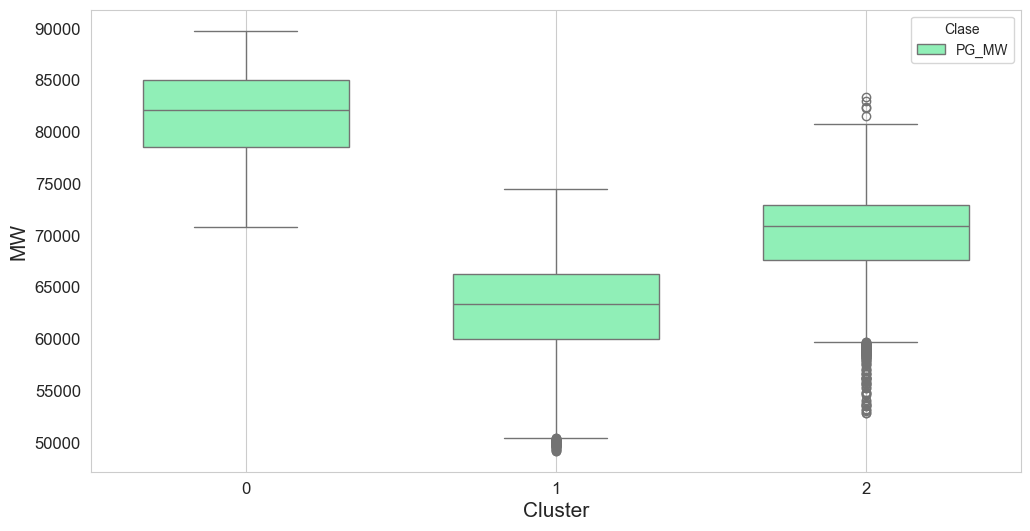

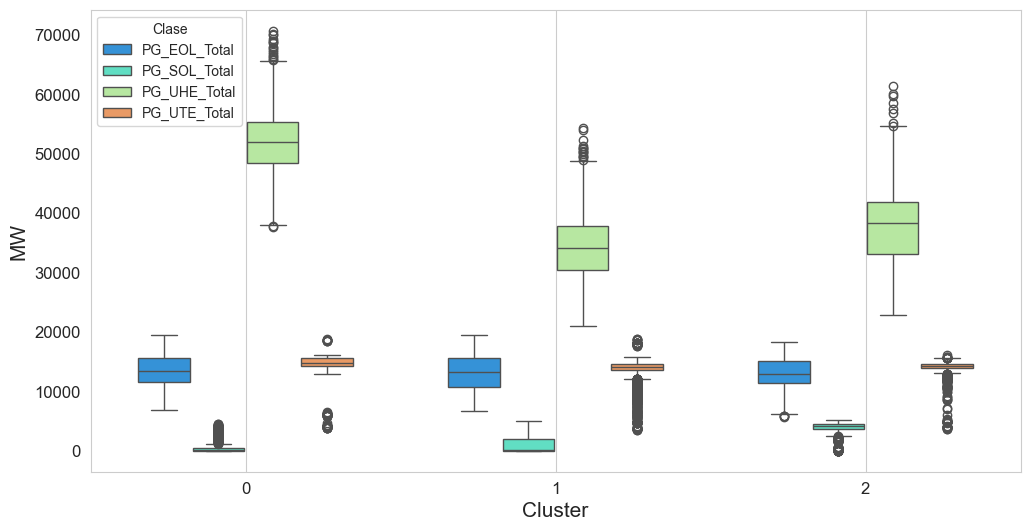

In [26]:
if ClusterEvaluation:
    dff = pd.melt(df[['PG_MW','Cluster']], id_vars=['Cluster'], value_vars=['PG_MW'], ignore_index = False).sort_values('Cluster')
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)
    dff = pd.melt(df[['PG_UHE_Total', 'PG_UTE_Total', 'PG_EOL_Total', 'PG_SOL_Total','Cluster']], id_vars=['Cluster'], value_vars=['PG_UHE_Total', 'PG_UTE_Total', 'PG_EOL_Total', 'PG_SOL_Total', ], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)

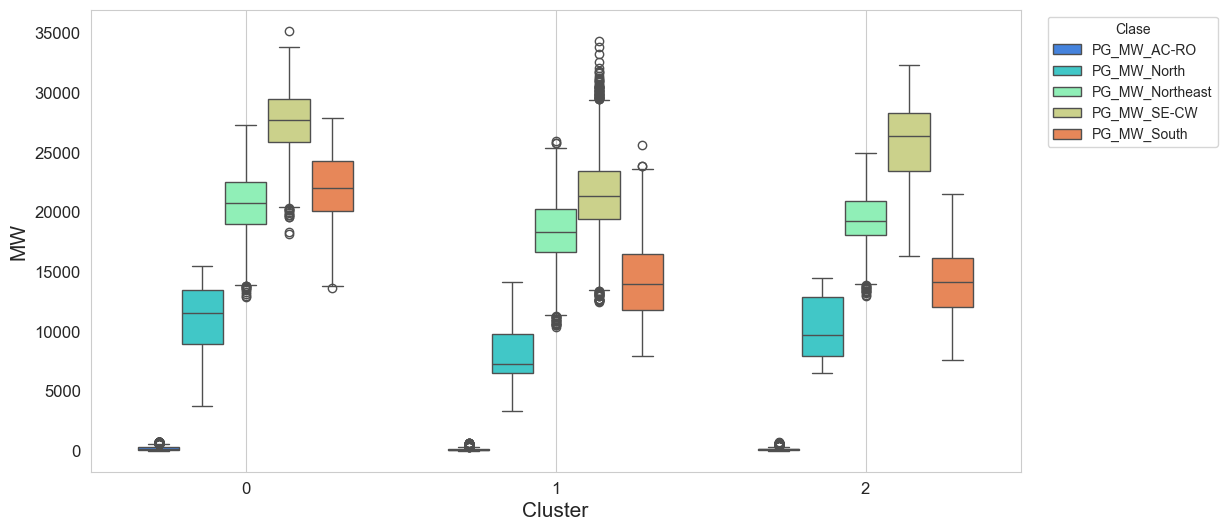

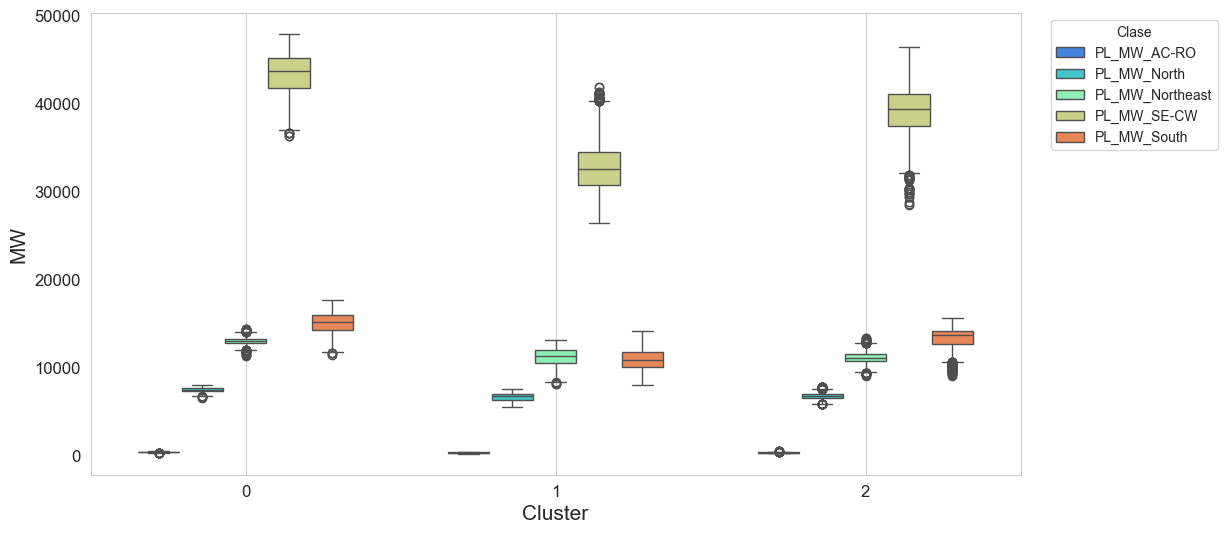

In [27]:
if ClusterEvaluation:
        cols = ['PG_MW_AC-RO',
                'PG_MW_Northeast',
                'PG_MW_North',
                'PG_MW_SE-CW',
                'PG_MW_South','Cluster'] 
        dff = pd.melt(df[cols], id_vars=['Cluster'], value_vars= cols[:-1], ignore_index = False).sort_values(['Cluster','variable'])
        boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None, legendPos=True)
        cols = ['PL_MW_AC-RO',
                'PL_MW_Northeast',
                'PL_MW_North',
                'PL_MW_SE-CW',
                'PL_MW_South','Cluster']
        dff = pd.melt(df[cols], id_vars=['Cluster'], value_vars= cols[:-1], ignore_index = False).sort_values(['Cluster','variable'])
        boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None, legendPos=True)

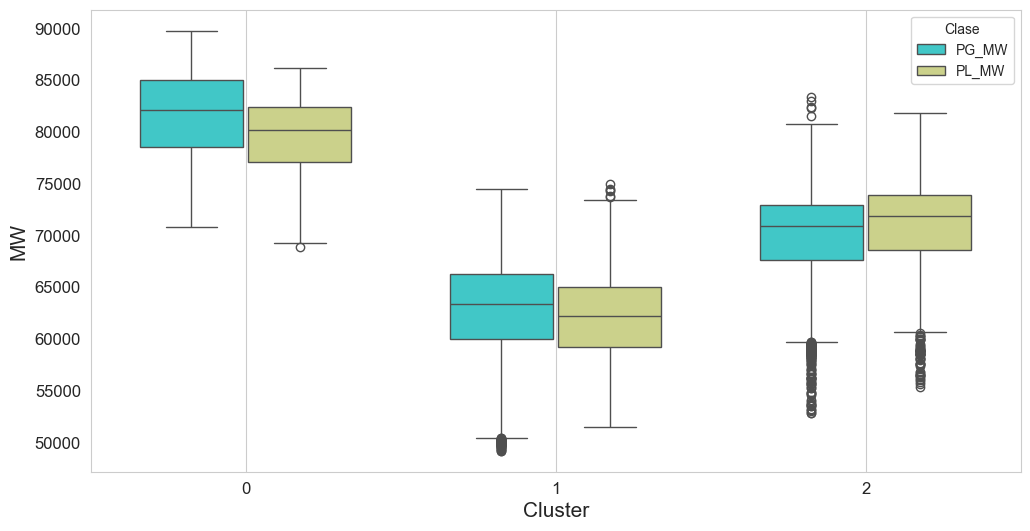

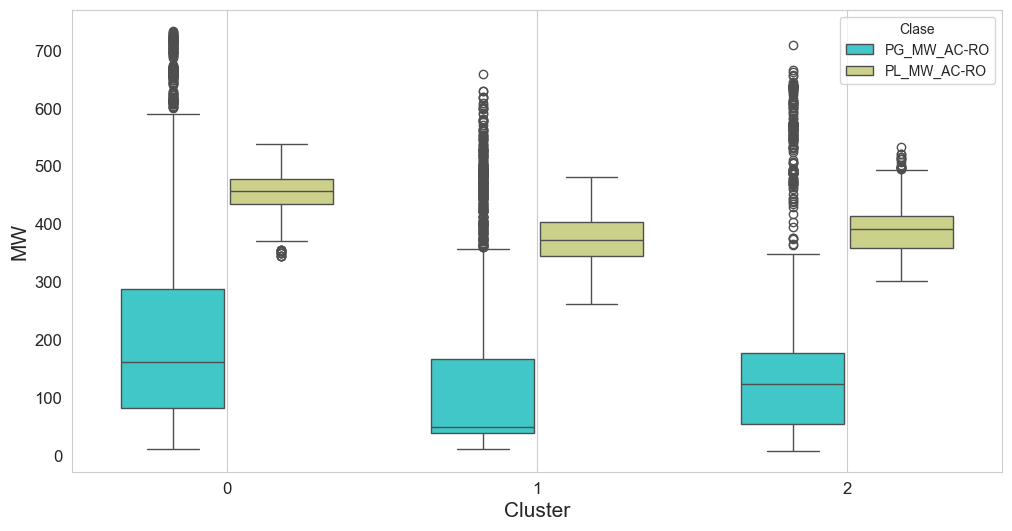

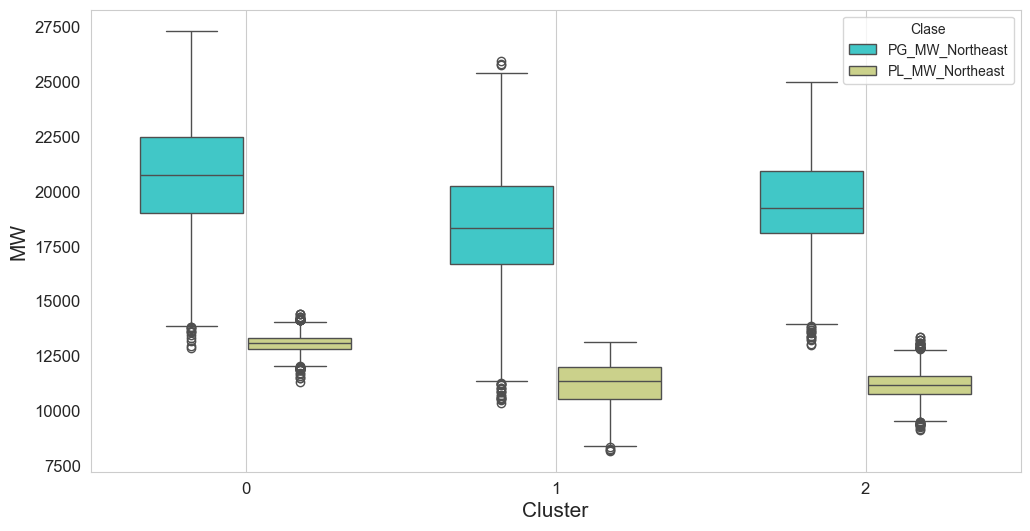

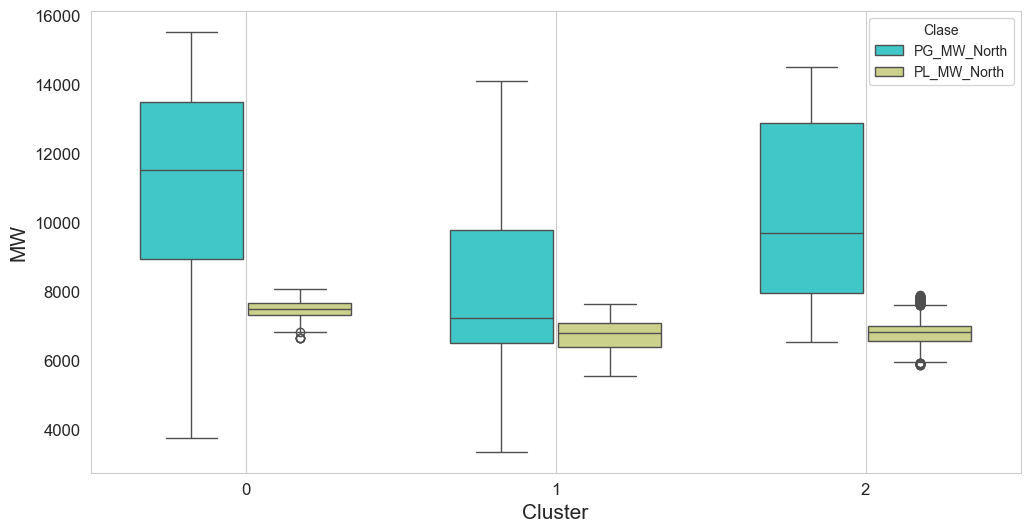

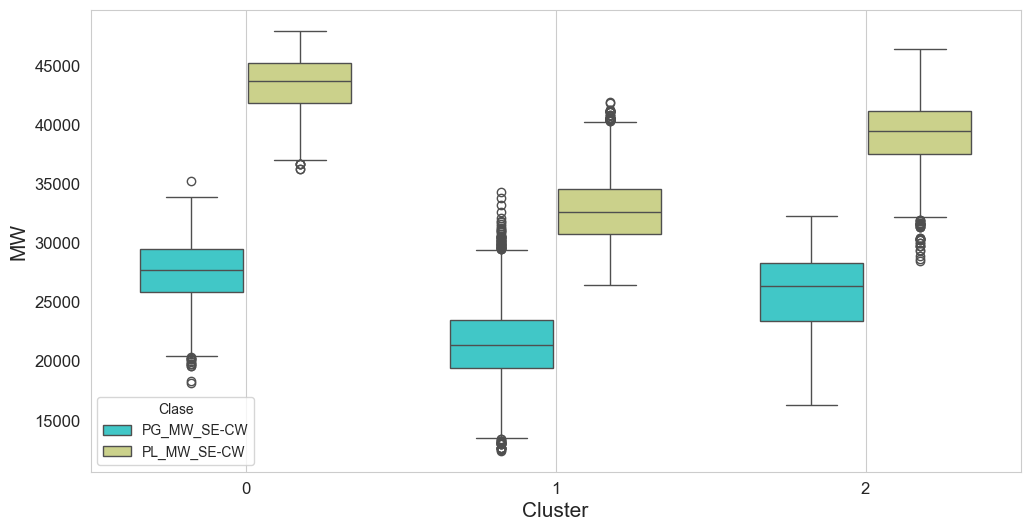

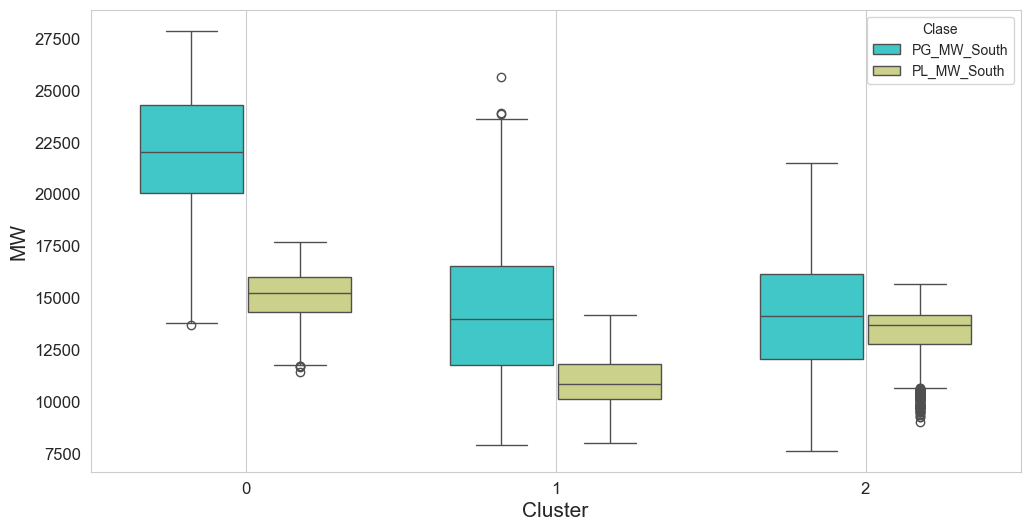

In [28]:
if ClusterEvaluation:
    dff = pd.melt(df[['PG_MW', 'PL_MW','Cluster']], id_vars=['Cluster'], value_vars=['PG_MW', 'PL_MW'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)
    cols = ['PG_MW_AC-RO','PL_MW_AC-RO','Cluster'] 
    dff = pd.melt(df[cols], id_vars=['Cluster'], value_vars= cols[:-1], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None,)
    cols = ['PG_MW_Northeast','PL_MW_Northeast','Cluster'] 
    dff = pd.melt(df[cols], id_vars=['Cluster'], value_vars= cols[:-1], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)
    cols = ['PG_MW_North','PL_MW_North','Cluster'] 
    dff = pd.melt(df[cols], id_vars=['Cluster'], value_vars= cols[:-1], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)
    cols = ['PG_MW_SE-CW','PL_MW_SE-CW','Cluster'] 
    dff = pd.melt(df[cols], id_vars=['Cluster'], value_vars= cols[:-1], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)
    cols = ['PG_MW_South','PL_MW_South','Cluster'] 
    dff = pd.melt(df[cols], id_vars=['Cluster'], value_vars= cols[:-1], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)

In [29]:
df.columns

Index(['PG_UHE_AC-RO', 'PG_UTE_AC-RO', 'PG_EOL_AC-RO', 'PG_SOL_AC-RO',
       'PG_BIO_AC-RO', 'PL_MW_AC-RO', 'PG_MW_AC-RO', 'OV DPI_PQ_AC-RO',
       'UV DPI_PQ_AC-RO', 'OV DPI_PV_AC-RO', 'UV DPI_PV_AC-RO', 'PI_mva_AC-RO',
       'PFI_AC-RO', 'PG_UHE_Northeast', 'PG_UTE_Northeast', 'PG_EOL_Northeast',
       'PG_SOL_Northeast', 'PG_BIO_Northeast', 'PL_MW_Northeast',
       'PG_MW_Northeast', 'OV DPI_PQ_Northeast', 'UV DPI_PQ_Northeast',
       'OV DPI_PV_Northeast', 'UV DPI_PV_Northeast', 'PI_mva_Northeast',
       'PFI_Northeast', 'PG_UHE_North', 'PG_UTE_North', 'PG_EOL_North',
       'PG_SOL_North', 'PG_BIO_North', 'PL_MW_North', 'PG_MW_North',
       'OV DPI_PQ_North', 'UV DPI_PQ_North', 'OV DPI_PV_North',
       'UV DPI_PV_North', 'PI_mva_North', 'PFI_North', 'PG_UHE_SE-CW',
       'PG_UTE_SE-CW', 'PG_EOL_SE-CW', 'PG_SOL_SE-CW', 'PG_BIO_SE-CW',
       'PL_MW_SE-CW', 'PG_MW_SE-CW', 'OV DPI_PQ_SE-CW', 'UV DPI_PQ_SE-CW',
       'OV DPI_PV_SE-CW', 'UV DPI_PV_SE-CW', 'PI_mva_SE-CW', 'PF

In [30]:
if  showAutoEncoder == True:
    # label = df.reset_index()['PL_Total'].values
    if region != 'all':
        if region == 'PO':
            label = df.reset_index().loc[:,'Elo_XINGU-SE'].values
        else:
            label = df.reset_index().loc[:,'PL_MW'].values
    else:
        label = df.reset_index()['PL_MW'].values
    fig = px.scatter(x=proj["comp_1"], y=proj["comp_2"], color=label, color_continuous_scale='rainbow')
    fig.update_layout(
        title="Autoencoder",
        xaxis_title="First comp",
        yaxis_title="Second comp",
        width=800,  # Width of the figure in pixels
        height=600,  # Height of the figure in pixels
    )
    fig.show()
if  showTSNE == True:
    fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=label, color_continuous_scale='rainbow')
    # fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1])
    fig.update_layout(
        title="t-SNE",
        xaxis_title="First t-SNE",
        yaxis_title="Second t-SNE",
        width=800,  # Width of the figure in pixels
        height=600,  # Height of the figure in pixels
    )
    fig.show()

if  DimensioreductionPCA == True:
    label = df.reset_index().loc[:,'PL_MW'].values
    fig = px.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], color=label, color_continuous_scale='rainbow')
    # fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1])
    fig.update_layout(
        title="PCA",
        xaxis_title="First comp",
        yaxis_title="Second comp",
        width=800,  # Width of the figure in pixels
        height=600,  # Height of the figure in pixels
    )
    fig.show()

# Machine Learning para Clasificar

In [118]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import shap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
shap.initjs()

'''
Index(['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV', 'OV condition',
       'UV condition', '% L1_500up', 'Mvar:Losses_500up', '% L1_500down',
       'Mvar:Losses_500down', 'PG_MW', 'QG_MVAR', 'PL_MW', 'QL_MVAR',
       'Shunt_Ind', 'Shunt_Cap', 'SHUNT_INST_IND', 'SHUNT_INST_CAP',
       'ReservaIND', 'ReservaCAP', 'PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL',
       'PG_BIO', 'PG_Dist', 'QG/QL', 'PG/PL', 'ReservaINDshunt',
       'ReservaCAPshunt', '% L1_Trafo', 'Mvar:Losses_Trafo', 'PI_mva', 'PFI',
       'Cenario Hidrologico'],  
'''

RegressorML = True
shapValues = True
PipelineObject = False
XGB_Regressor = True
Trainall = True

columns2 = []
# columns2 = ['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV','PI_mva', 'PFI']
# columns2 = ['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV']
# columns2 = ['PG_MW', 'PL_MW', 'Shunt_Ind', 'Shunt_Cap', 'PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL']  #Colocar TRUE PARA ACDCflux
datapd3 = flatdataframe(dfanalise, cenario, region, columns2, ACDCflux = False, Reserva=False, DPI=True, IndiceGroup=True, InfoPO=False, PImva_reg_nt=False, PImva=False)
display(datapd3.columns)
datapd3.shape

C:\Users\david\AppData\Local\Temp\ipykernel_18388\3197969446.py:51: PerformanceWarning:

indexing past lexsort depth may impact performance.



Index(['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper', 'DPI_inf_AC-RO_230.0',
       'DPI_sup_AC-RO_230.0', 'DPI_inf_North_230.0', 'DPI_sup_North_230.0',
       'DPI_inf_North_500.0', 'DPI_sup_North_500.0', 'DPI_inf_Northeast_230.0',
       'DPI_sup_Northeast_230.0', 'DPI_inf_Northeast_500.0',
       'DPI_sup_Northeast_500.0', 'DPI_inf_SE-CW_230.0', 'DPI_sup_SE-CW_230.0',
       'DPI_inf_SE-CW_345.0', 'DPI_sup_SE-CW_345.0', 'DPI_inf_SE-CW_440.0',
       'DPI_sup_SE-CW_440.0', 'DPI_inf_SE-CW_500.0', 'DPI_sup_SE-CW_500.0',
       'DPI_inf_SE-CW_525.0', 'DPI_sup_SE-CW_525.0', 'DPI_inf_SE-CW_765.0',
       'DPI_sup_SE-CW_765.0', 'DPI_inf_South_230.0', 'DPI_sup_South_230.0',
       'DPI_inf_South_500.0', 'DPI_sup_South_500.0', 'DPI_inf_South_525.0',
       'DPI_sup_South_525.0', 'DPI_inf_South_765.0', 'DPI_sup_South_765.0',
       'DPI_inf_AC-RO_PCH', 'DPI_sup_AC-RO_PCH', 'DPI_inf_AC-RO_SIN',
       'DPI_sup_AC-RO_SIN', 'DPI_inf_AC-RO_UHE', 'DPI_sup_AC-RO_UHE',
       'DPI_inf_AC-RO_UTE', '

(5325, 88)

In [120]:
if RegressorML:
    # colmns = ['PV_lower','PV_upper', 'PQ_lower', 'PQ_upper', 'PI_mva', 'PFI']
    colmns = ['PV_lower','PV_upper', 'PQ_lower', 'PQ_upper']
    # colmns = ['OV DPI_PQ_AC-RO', 'UV DPI_PQ_AC-RO', 'OV DPI_PV_AC-RO',
    #             'UV DPI_PV_AC-RO', 'OV DPI_PQ_Northeast', 'UV DPI_PQ_Northeast',
    #             'OV DPI_PV_Northeast', 'UV DPI_PV_Northeast', 'OV DPI_PQ_North',
    #             'UV DPI_PQ_North', 'OV DPI_PV_North', 'UV DPI_PV_North',
    #             'OV DPI_PQ_SE-CW', 'UV DPI_PQ_SE-CW', 'OV DPI_PV_SE-CW',
    #             'UV DPI_PV_SE-CW', 'OV DPI_PQ_South', 'UV DPI_PQ_South',
    #             'OV DPI_PV_South', 'UV DPI_PV_South']
    columns_to_keep = datapd3.columns[~datapd3.columns.isin(colmns)]
    X = datapd3[columns_to_keep]
    Y = datapd3[colmns]

In [121]:
if RegressorML:
    if Trainall:
        X_train, y_train = X, Y
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state = 42 ,shuffle=True) #revert
        
    numerical_features = [c for c in X_train.columns]
    num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
    # num = [([n], StandardScaler()) for n in numerical_features]
    mapper = DataFrameMapper(num, df_out=True)

    if XGB_Regressor:
        model = xgb.XGBRegressor(objective="reg:squarederror")
        pipeline = Pipeline([
        ('preprocess', mapper),
        ('xgb', model)
        ])
    else:
        model = LinearRegression()
        pipeline = Pipeline([
        ('preprocess', mapper),
        ('reg', model)
        ])
    print(f'Total de samples para trenamento: {X_train.shape[0]}')

Total de samples para trenamento: 5325


In [122]:
if RegressorML:
    if PipelineObject:
        print('========= PipelineObject ==========')
        pipeline.fit(X_train, y_train)
        if Trainall:
            y_pred = pipeline.predict(X_train)
            Y_true = y_train
        else:
            y_pred = pipeline.predict(X_test)
            Y_true = y_test
    else:
        model.fit(X_train, y_train)
        if Trainall:
            y_pred = model.predict(X_train)
            Y_true = y_train
        else:
            y_pred = model.predict(X_test)
            Y_true = y_test

    mse = mean_squared_error(Y_true, y_pred)
    mae = mean_absolute_error(Y_true, y_pred)
    r2 = r2_score(Y_true, y_pred)
    rmse = np.sqrt(mse)
    print('========= ANALIS GERAL ==========')
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R^2):", r2)
    print("Root Mean Squared Error (RMSE):", rmse)

    print(y_pred[0])

========= ANALIS GERAL ==========
Mean Squared Error (MSE): 1.4236363638592856e-05
Mean Absolute Error (MAE): 0.002284800446701172
R-squared (R^2): 0.9957047355792792
Root Mean Squared Error (RMSE): 0.003773110605136411
[0.42573664 0.07331741 0.19073449 0.00702623]


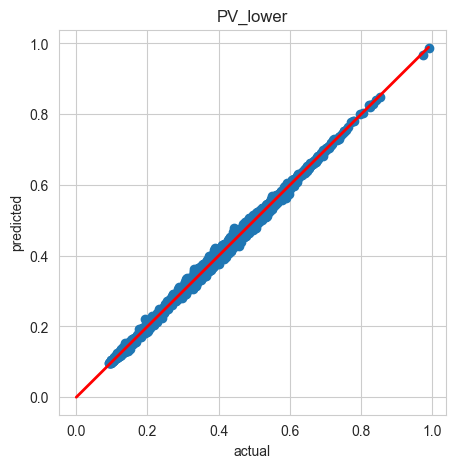

Mean Squared Error (MSE): 4.485469345033687e-05
Mean Absolute Error (MAE): 0.0049778562768939836
R-squared (R^2): 0.9963066624838832
Root Mean Squared Error (RMSE): 0.006697364664577916


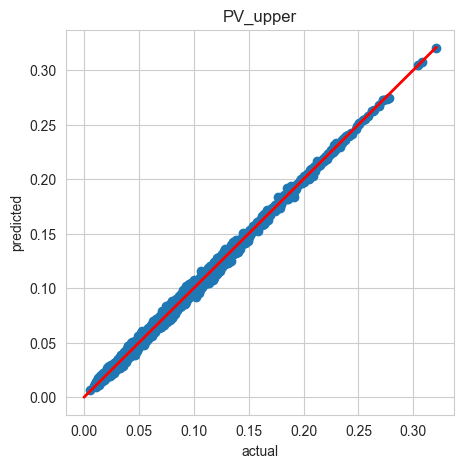

Mean Squared Error (MSE): 4.3918205931189426e-06
Mean Absolute Error (MAE): 0.0015464616489584756
R-squared (R^2): 0.9980832987964776
Root Mean Squared Error (RMSE): 0.002095667099784444


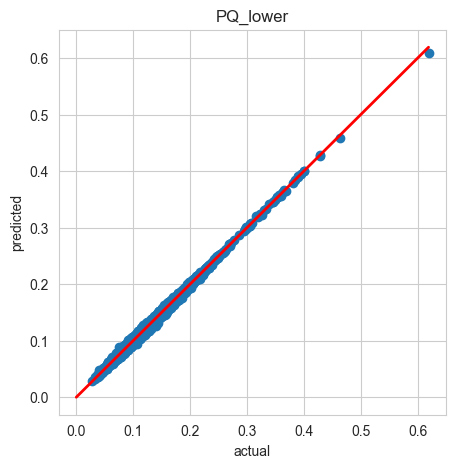

Mean Squared Error (MSE): 6.920857610269925e-06
Mean Absolute Error (MAE): 0.0019789337489541747
R-squared (R^2): 0.996509810789823
Root Mean Squared Error (RMSE): 0.0026307522897965753


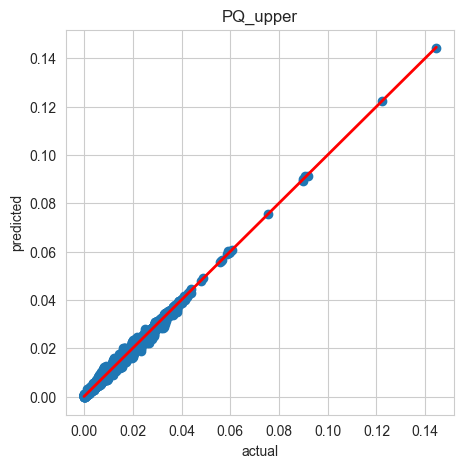

Mean Squared Error (MSE): 7.780829006456892e-07
Mean Absolute Error (MAE): 0.0006359501119980357
R-squared (R^2): 0.9919191702469329
Root Mean Squared Error (RMSE): 0.0008820900751316099


In [123]:
if RegressorML:
    # Paso 4: Calcular las métricas de evaluación
    for idx, col in enumerate(Y_true.columns):

        plt.figure(figsize=(5,5))
        plt.scatter(Y_true.iloc[:,idx].values,y_pred[:,idx])
        plt.plot([0,Y_true.iloc[:,idx].max()], [0,Y_true.iloc[:,idx].max()], color='r',linestyle ='-', linewidth=2)
        plt.ylabel('predicted')
        plt.xlabel('actual')
        plt.title(col)
        plt.show()

        mse = mean_squared_error(Y_true.iloc[:,idx], y_pred[:,idx])
        mae = mean_absolute_error(Y_true.iloc[:,idx], y_pred[:,idx])
        r2 = r2_score(Y_true.iloc[:,idx], y_pred[:,idx])
        rmse = np.sqrt(mse)
        print('======================================')
        print("Mean Squared Error (MSE):", mse)
        print("Mean Absolute Error (MAE):", mae)
        print("R-squared (R^2):", r2)
        print("Root Mean Squared Error (RMSE):", rmse)
        print('======================================')

## Shap values

In [124]:
if shapValues:
    if Trainall:
        X_test = X_train

    if PipelineObject:
        explainer = shap.Explainer(pipeline.predict, X_train, algorithm = "permutation")
        shap_values = explainer(X_test)
        shapeshap = np.shape(shap_values.values) # We have one SHAP value for each feature in our modul
        print(f'In your case, your SHAP values have shape {shapeshap}, so you have SHAP values for multiple instances ({shapeshap[0]} instances in this case) and multiple features ({shapeshap[1]} features with {shapeshap[2]} outputs).')
    else:
        if XGB_Regressor == False:
            explainer_2 = shap.Explainer(model.predict,X_train,algorithm = "permutation")
        else:
            # explainer_2 = shap.Explainer(model.predict,X_train,algorithm = "permutation")
            explainer_2 = shap.Explainer(model,algorithm = "tree")
        shap_values_2 = explainer_2(X_test)
        shapeshap_2 = np.shape(shap_values_2.values) # We have one SHAP value for each feature in our modul
        print(f'In your case, your SHAP values have shape {shapeshap_2}, so you have SHAP values for multiple instances ({shapeshap_2[0]} instances in this case) and multiple features ({shapeshap_2[1]} features with {shapeshap_2[2]} outputs).')

In your case, your SHAP values have shape (5325, 84, 4), so you have SHAP values for multiple instances (5325 instances in this case) and multiple features (84 features with 4 outputs).


In [125]:
if shapValues:
    # Assuming shap_values is your array with shape (1346, 143, 6)
    # Selecting SHAP values for a specific instance (e.g., first instance) and output (e.g., first output)
    instance_index = 0
    # for i in range(shapeshap[2]):
    #     shap_values_instance_output = shap_values[instance_index][:, i]
    #     # Visualize waterfall plot for the selected instance and output
    #     plt.title(f'{Y.columns[i]}')
    #     shap.plots.waterfall(shap_values_instance_output,max_display=10)
        
    # #Mean SHAP
    # for i in range(shapeshap[2]):
    #     plt.title(f'{Y.columns[i]}')
    #     shap.plots.bar(shap_values[:,:, i],max_display=15) #Features that have made large positive/negative contributions will have a large mean SHAP value.

    # # Beeswarm plot
    # for i in range(shapeshap[2]):
    #     plt.title(f'{Y.columns[i]}')
    #     shap.plots.beeswarm(shap_values[:,:, i],max_display=15)

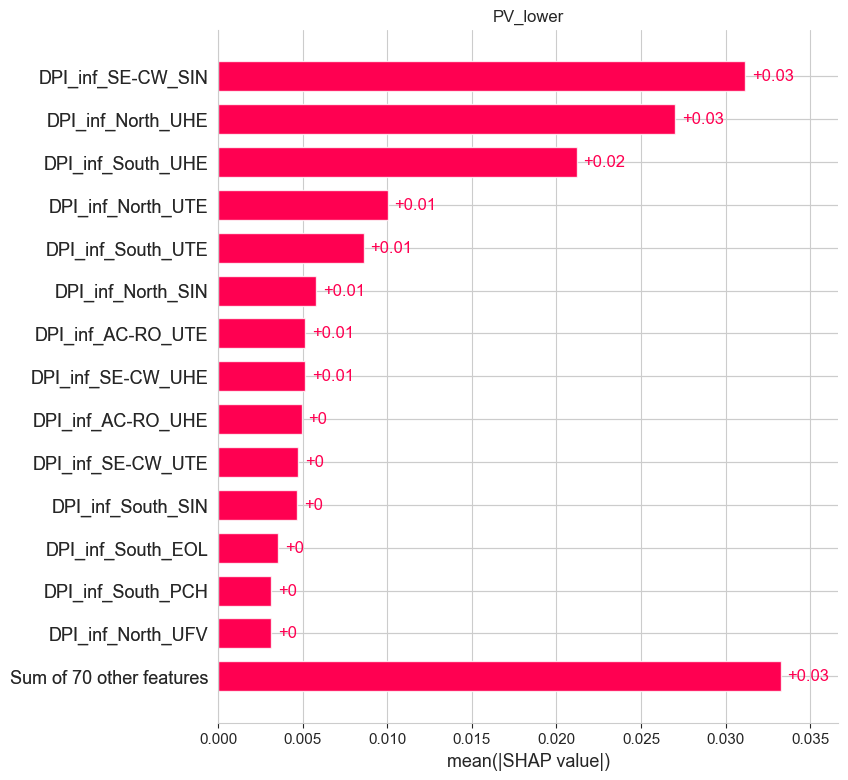

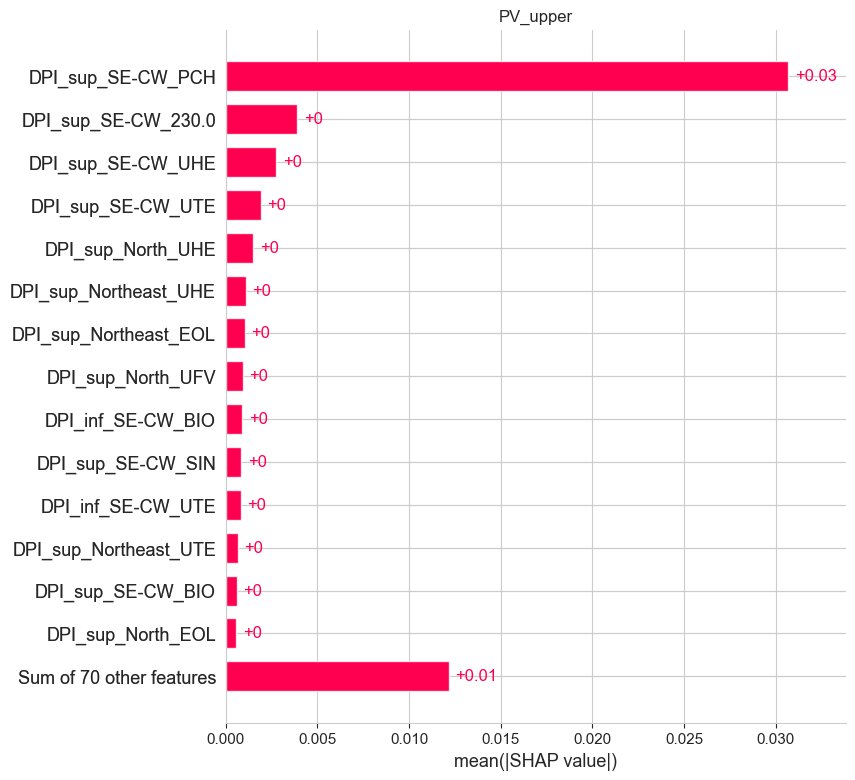

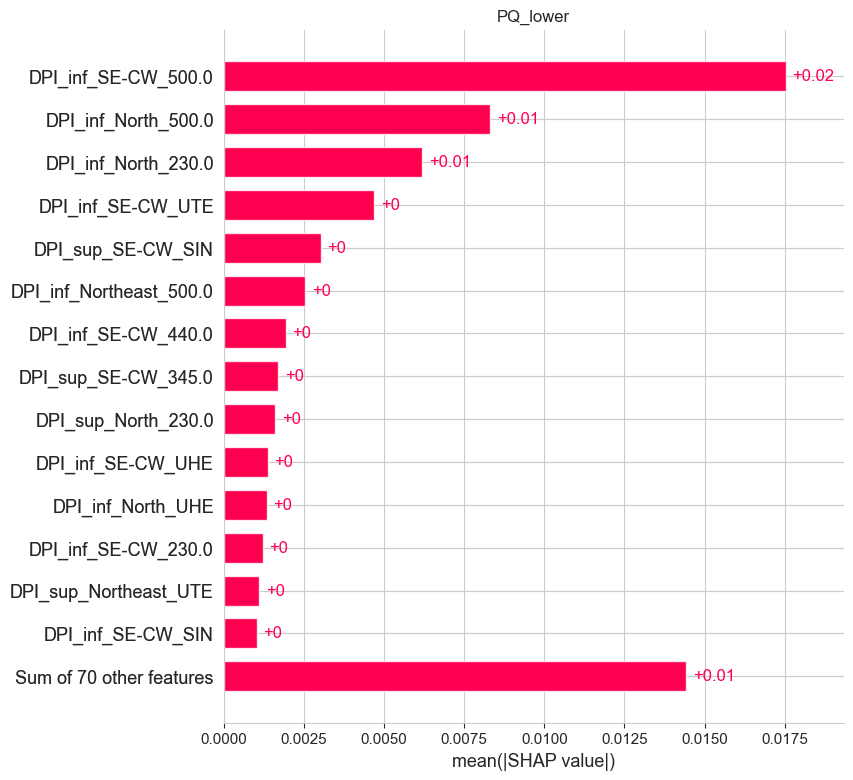

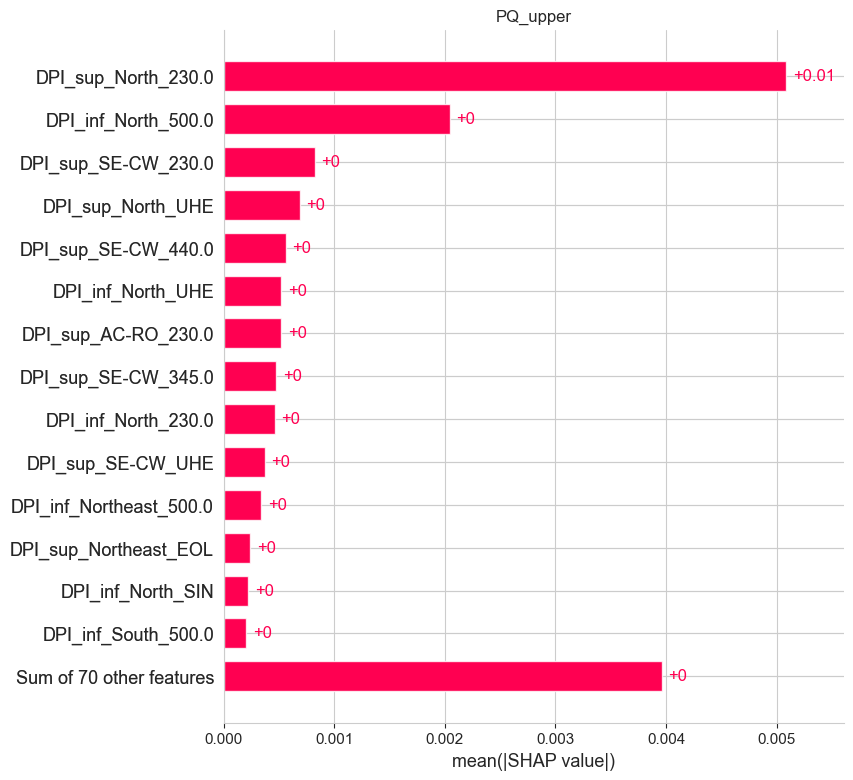

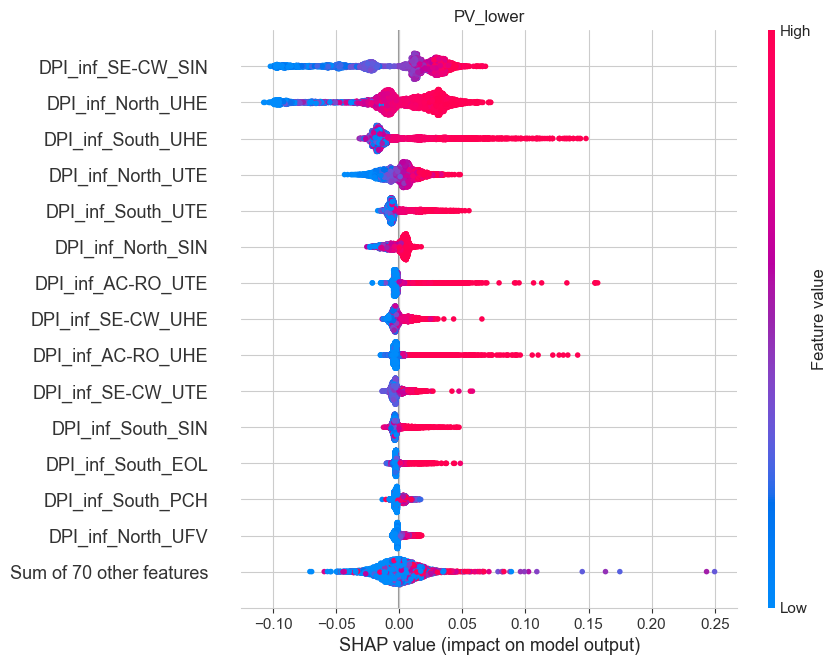

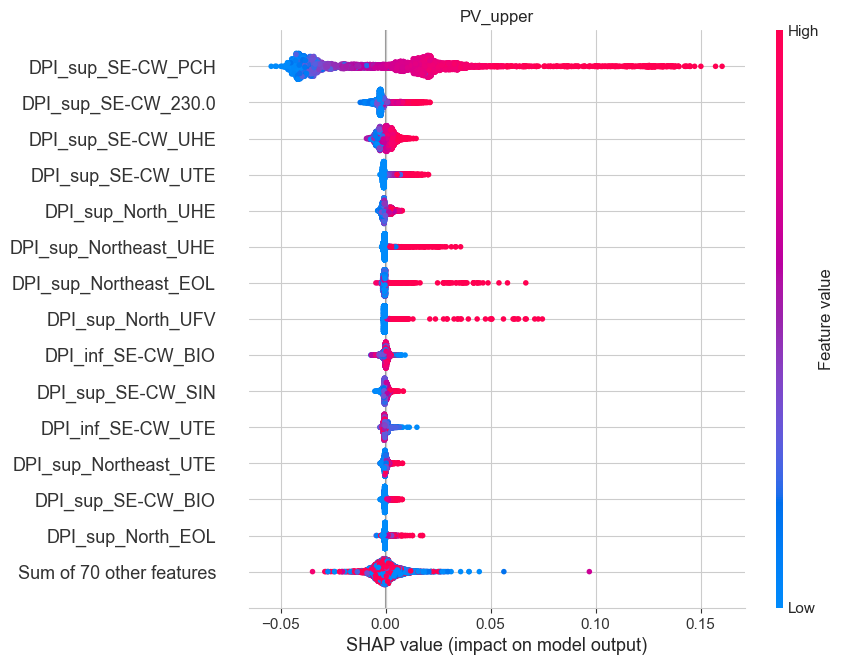

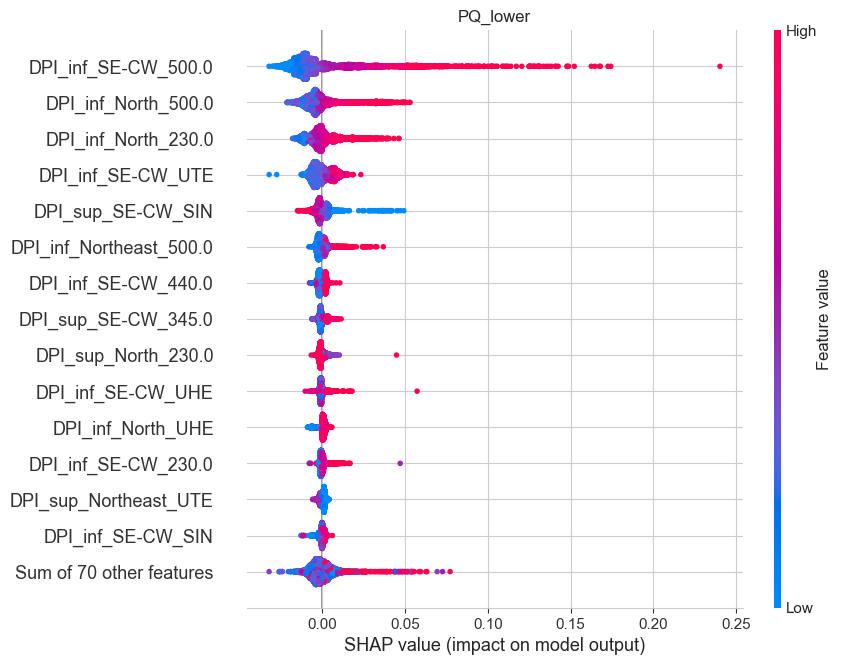

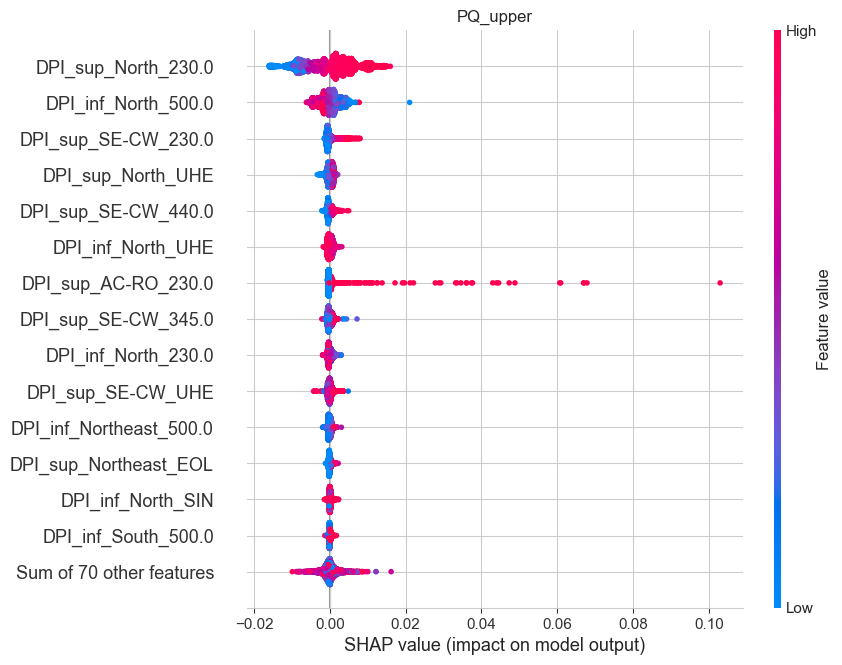

In [126]:
if shapValues:
    # Assuming shap_values is your array with shape (1346, 143, 6)
    # Selecting SHAP values for a specific instance (e.g., first instance) and output (e.g., first output)
    instance_index = 0
    # for i in range(shapeshap_2[2]):
    #     shap_values_instance_output = shap_values_2[instance_index][:, i]
    #     # Visualize waterfall plot for the selected instance and output
    #     plt.title(f'{Y.columns[i]}')
    #     shap.plots.waterfall(shap_values_instance_output,max_display=10)
        
    #Mean SHAP
    for i in range(shapeshap_2[2]):
        plt.title(f'{Y.columns[i]}')
        shap.plots.bar(shap_values_2[:,:, i],max_display=15) #Features that have made large positive/negative contributions will have a large mean SHAP value.

    # Beeswarm plot
    for i in range(shapeshap_2[2]):
        plt.title(f'{Y.columns[i]}')
        shap.plots.beeswarm(shap_values_2[:,:, i],max_display=15)
    

In [129]:
# shap.plots.force(shap_values_2[0:2,:, 0]) # PV LOWER

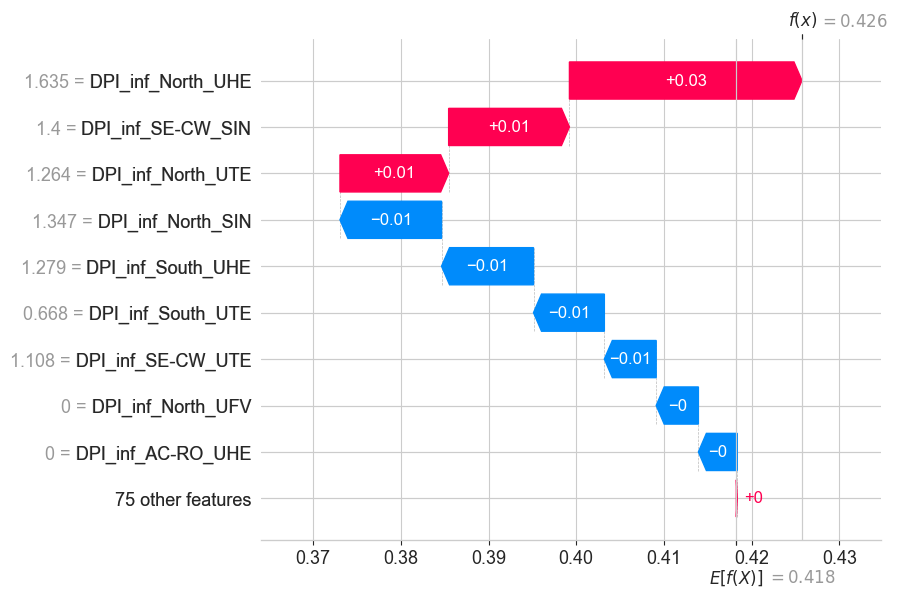

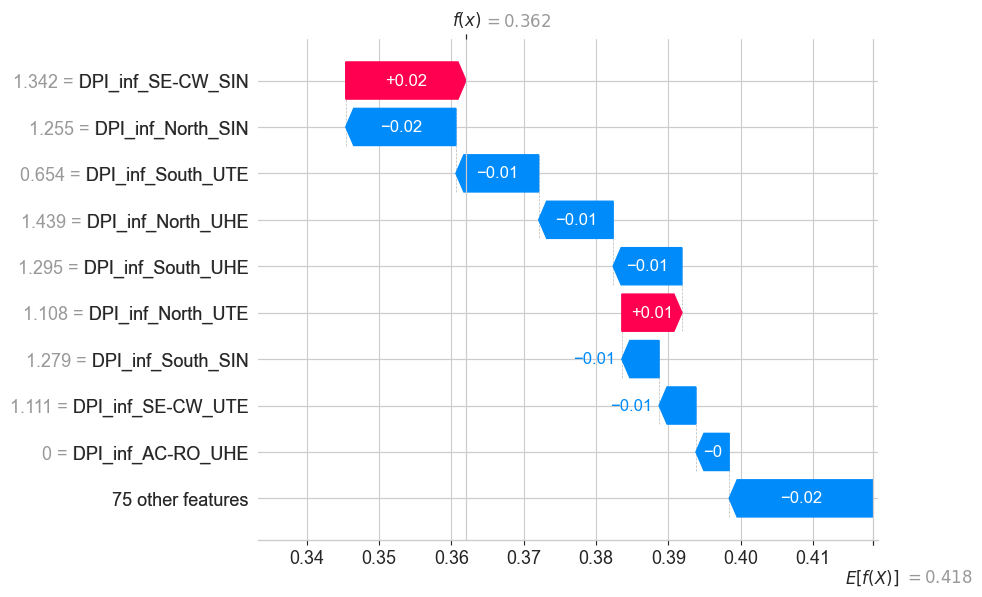

In [128]:
shap.plots.waterfall(shap_values_2[0,:, 0],max_display=10)
shap.plots.waterfall(shap_values_2[1,:, 0]) # PV LOWER